# FORMULA 1 - 2024 SEASON ANALYSIS

## Created by Doğan Yiğit Yenigün (a.k.a. toUpperCase78)

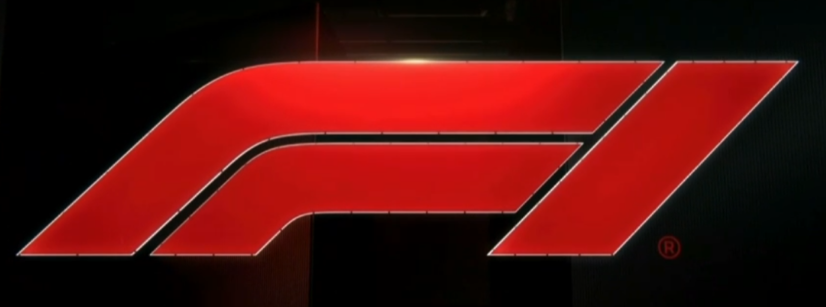

## Welcome to the 2024 Season Analysis of Formula 1 World Championship!

Here comes another F1 season, with all the beauties, entertainments, striking moments, tough competitions, excitements, pleasures, sadness; all the emotions to feel. The most talented drivers and teams prepared themselves in the most prestigious open-wheel motorsport series to become the best all over the world in various circuits and conditions. We the fans impatiently waited for every race weekends to watch the sessions on TV, or on the Internet, or live in the grandstands; show the love and support to our favourite driver and team.

As it is known in 2024 Season consequently, it was another world championship title for **Max Verstappen**, added to his career for the 4th time consecutively! **McLaren** accomplished to be the constructors' champion more than 20 years later! History has been written once again for the Dutch driver by continuing the determination to be crowned as the best, and for the British team to end the waiting year after year for another title by showing off the team spirit and building the fastest car!

In all the circumstances happened within the 2024 season, the most relevant answer to seek out is how it ended up for all the drivers and all the teams; more importantly, how Verstappen and McLaren achieved to finish in the top. There are lots of aspects to be looked at, interpretations to be made and interesting facts to be revealed! That's why, the analyses are here to give out all the information in the best effort I presented with passion!

**If you are ready for the broad analyses of F1 2024 Season, let's put the five red lights and away we go!**

_Let's import the necessary libraries, the related font and the datasets to get all the analysis done for good, as well as a helper method to properly colorize the drivers and teams in visualizations._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline
font_manager.fontManager.addfont('C:\\Users\\yigit\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Formula1-Regular_web.ttf')

In [2]:
season2024RaceCalendar = pd.read_csv('Formula1_2024season_calendar.csv')
season2024RaceCalendar.set_index('Round', inplace=True)
season2024Drivers = pd.read_csv('Formula1_2024season_drivers.csv')
season2024Drivers.set_index('Abbreviation', inplace=True)
season2024Teams = pd.read_csv('Formula1_2024season_teams.csv')
season2024Teams.index = range(1,11)
season2024QualifyingResults = pd.read_csv('Formula1_2024season_qualifyingResults.csv')
season2024SprintResults = pd.read_csv('Formula1_2024season_sprintResults.csv')
season2024SprintQualiResults = pd.read_csv('Formula1_2024season_sprintQualifyingResults.csv')
season2024RaceResults = pd.read_csv('Formula1_2024season_raceResults.csv')
season2024DotdVotes = pd.read_csv('Formula1_2024season_driverOfTheDayVotes.csv')
season2024DotdVotes.set_index('Track', inplace=True)

In [3]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':
            abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':
            abbr = val[0:4].upper()
        if abbr in ['KICK','BOT','ZHO']:           cl.append('#52D752')
        elif abbr in ['HAAS','HUL','MAG','BEA']:   cl.append('#FFFFFF')
        elif abbr in ['ASTO','ALO','STR']:         cl.append('#006F62')
        elif abbr in ['WILL','ALB','SAR','COL']:   cl.append('#005AFF')
        elif abbr in ['RB H','TSU','RIC','LAW']:   cl.append('#6692D1')
        elif abbr in ['MCLA','NOR','PIA']:         cl.append('#FF8205')
        elif abbr in ['RED ','VER','PER']:         cl.append('#0600F0')
        elif abbr in ['FERR','LEC','SAI']:         cl.append('#FF0000')
        elif abbr in ['MERC','HAM','RUS']:         cl.append('#00C8AA')
        elif abbr in ['ALPI','GAS','OCO','DOO']:   cl.append('#FF87BB')
    return cl

## 2024 Season Race Calendar

In [4]:
season2024RaceCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,02/03/2024,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,09/03/2024,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.734,Lewis Hamilton,2021,27,3
3,24/03/2024,Rolex Australian GP,Australia,Melbourne,Albert Park Grand Prix Circuit,1996,58,5.278,306.124,1:19.813,Charles Leclerc,2024,14,4
4,07/04/2024,MSC Cruises Japanese GP,Japan,Suzuka,Suzuka Circuit,1987,53,5.807,307.471,1:30.983,Lewis Hamilton,2019,18,1
5,21/04/2024,Lenovo Chinese GP,China,Shanghai,Shanghai International Circuit,2004,56,5.451,305.066,1:32.238,Michael Schumacher,2004,16,2
6,05/05/2024,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:29.708,Max Verstappen,2023,19,3
7,19/05/2024,MSC Cruises Gran Premio Del Made in Italy e De...,Italy,Imola,Autodromo Internazionale Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
8,26/05/2024,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
9,09/06/2024,AWS Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2019,14,3


The calendar of 2024 Season encompassed the most race weekends in Formula 1 history: **24 races** across **21 countries**!

When compared to 2023 Season, there were a few changes occurred:

* **Azerbaijan** was moved to September to host the **17th** race weekend, it was the 4th in 2023.
* **Japan** was decided to host early in 2024, being moved to round 4, unlike the previous seasons for a very long time such that it was in September or October. That means, together with 2023, the race in Suzuka was organized twice in less than a year.
* It is nice to see **China** back in the calendar after 5 years of absence, as being the round 5, mainly because of the effect of **Covid-19** outbreak. This season has given Shanghai the opportunity to organize a F1 race weekend.
* The race in **Imola** was available in 2024 without any problem. Remember that it was called off in 2023, due to the excessive flooding at the date it was expected to host the race.

## 2024 Season Drivers

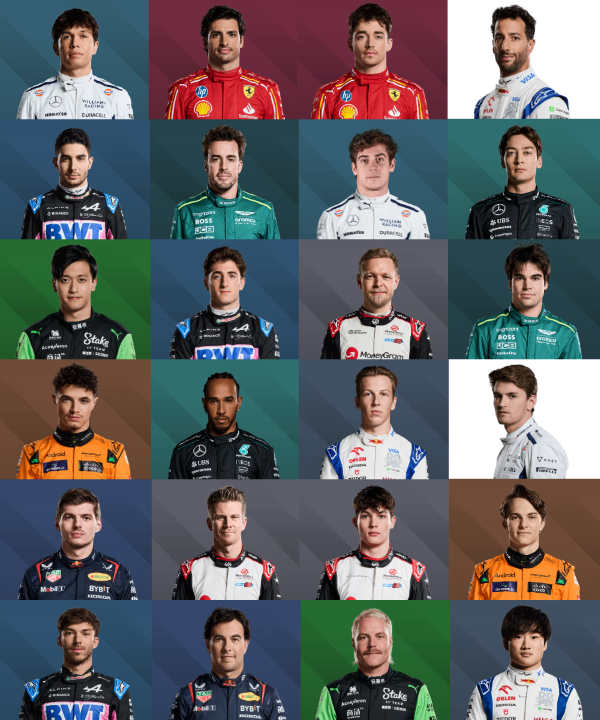

_All the information below reflect the post-2024 season results._

In [5]:
season2024Drivers

,Driver,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
VER,Max Verstappen,1,Red Bull Racing,Netherlands,112,3023.5,209,4,1(x63),1,30/09/1997,"Hasselt, Belgium"
NOR,Lando Norris,4,McLaren,United Kingdom,26,1007.0,128,0,1(x4),1,13/11/1999,"Bristol, England"
LEC,Charles Leclerc,16,Ferrari,Monaco,43,1430.0,149,0,1(x8),1,16/10/1997,"Monte Carlo, Monaco"
PIA,Oscar Piastri,81,McLaren,Australia,10,389.0,46,0,1(x2),2,06/04/2001,"Melbourne, Victoria"
SAI,Carlos Sainz,55,Ferrari,Spain,27,1272.5,208,0,1(x4),1,01/09/1994,"Madrid, Spain"
RUS,George Russell,63,Mercedes,United Kingdom,15,714.0,128,0,1(x3),1,15/02/1998,"King's Lynn, England"
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,202,4862.5,356,7,1(x105),1,07/01/1985,"Stevenage, England"
PER,Sergio Perez,11,Red Bull Racing,Mexico,39,1638.0,282,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
ALO,Fernando Alonso,14,Aston Martin,Spain,106,2337.0,404,2,1(x32),1,29/07/1981,"Oviedo, Spain"


2024 Season started with **20 drivers**, including **4 additional drivers** who drove as **reserve** or **replaced** the one from the main squad for the remainder of the season.

Interestingly, this season started with **NO driver changes** across all teams, if compared with the main drivers at the end of 2023 Season. As stated before, however, some changes occurred as the season progressed:

* **Oliver Bearman** drove for Ferrari, replacing **Carlos Sainz** in Saudi Arabia; and also for **Haas**, replacing **Kevin Magnussen** in Azerbaijan and Brazil.
* In Williams, **Logan Sargeant** was kicked out after Belgium GP and was replaced by **Franco Colapinto** to participate for the rest of the races after that point.
* Likewise, **Daniel Ricciardo** left the **RB** team after Singapore GP and **Liam Lawson** replaced him to compete in the remaining races.
* Before Abu Dhabi GP which is the last race of the season, **Esteban Ocon** parted ways with **Alpine**. Thus, this gave **Jack Doohan** the chance to make his debut in his F1 career.

## 2024 Season Teams

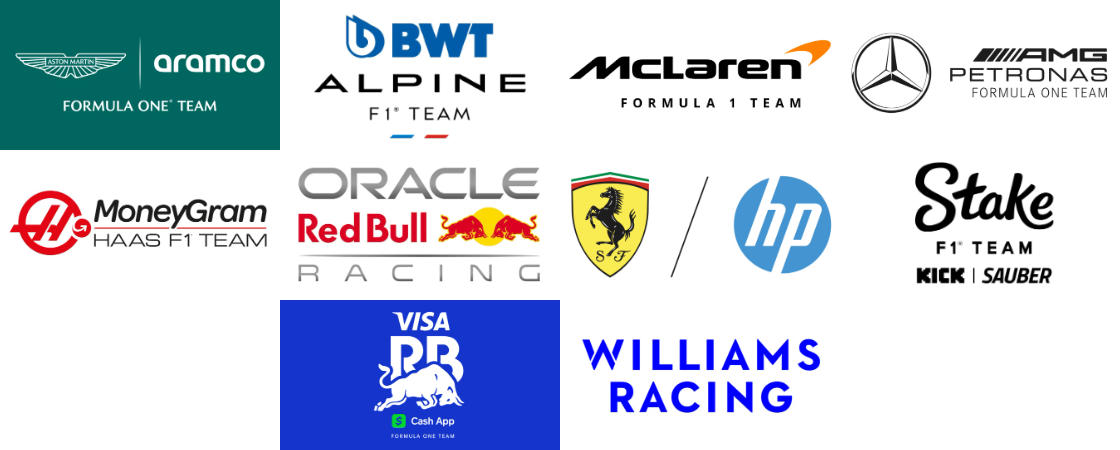

_All the information below reflect the post-2024 season results._

In [6]:
season2024Teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL38,Mercedes,1966,9,1(x189),164,172
2,Ferrari,Scuderia Ferrari HP,"Maranello, Italy",Frédéric Vasseur,Loic Serra / Enrico Gualtieri,SF-24,Ferrari,1950,16,1(x249),253,263
3,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB20,Honda RBPT,1997,6,1(x122),103,99
4,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W15,Mercedes,1970,8,1(x120),133,100
5,Aston Martin,Aston Martin Aramco F1 Team,"Silverstone, United Kingdom",Mike Crack,Bob Bell,AMR24,Mercedes,2018,0,1(x1),1,3
6,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Oliver Oakes,David Sanchez,A524,Renault,1986,2,1(x21),20,16
7,Haas,MoneyGram Haas F1 Team,"Kannapolis, United States",Ayao Komatsu,Andrea De Zordo,VF-24,Ferrari,2016,0,4(x1),1,3
8,RB,Visa Cash App RB Formula One Team,"Faenza, Italy",Laurent Mekies,Jody Egginton,VCARB 01,Honda RBPT,1985,0,1(x2),1,4
9,Williams,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW46,Mercedes,1978,9,1(x114),128,133
10,Kick Sauber,Stake F1 Team Kick Sauber,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C44,Ferrari,1993,0,1(x1),1,7


Once again, F1 has seen another **season with 10 teams** competing for the championship, so 2024 is similar to previous ones in many years. Here are the changes compared to 2023:

* **Ferrari** signed multi-year contract with **HP (Hewlett-Packard)** in the middle of the season, for aiding the team with HP-powered computers, technologies, collaboration products, including the naming sponsorship. That's why, the Italian team is now called **Scuderia Ferrari HP**.
* **AlphaTauri** has been re-branded as **RB** (Racing Bulls), along with their main sponsor, **Visa Cash App**. This might cause a confusion with the actual **Red Bull** at first due to the similarity in names, but know that they are still **the sister team**. Their livery was mixed with dark blue and white colors.
* **Alfa Romeo** dropped their names on Sauber team at the end of 2023; because of that, they were then re-branded as **Stake Kick Sauber** with energetic green and black color livery.
* **Haas** made an agreement with **Toyota** which returned back to F1 after 15 years, in the way that they support the American team with technical knowledge.

## Several Noteworthy Races of 2024 Season

From the first one to the last, 2024 Season witnessed such several races that unforgettable scenes have taken part and people will talk about them even in the next years! In this section, I've chosen **eight** of them for highlighting what happened (including the race results of top 10):

### STC Saudi Arabia Grand Prix 2024

In [7]:
season2024RaceResults[season2024RaceResults['Track'] == 'Saudi Arabia'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,50,1:20:43.273,25,No,1:31.773
2,11,Sergio Perez,Red Bull Racing Honda RBPT,3,50,+13.643,18,No,1:32.273
3,16,Charles Leclerc,Ferrari,2,50,+18.639,16,Yes,1:31.632
4,81,Oscar Piastri,McLaren Mercedes,5,50,+32.007,12,No,1:32.310
5,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,50,+35.759,10,No,1:32.387
6,63,George Russell,Mercedes,7,50,+39.936,8,No,1:32.254
7,38,Oliver Bearman,Ferrari,11,50,+42.679,6,No,1:32.186
8,4,Lando Norris,McLaren Mercedes,6,50,+45.708,4,No,1:31.944
9,44,Lewis Hamilton,Mercedes,8,50,+47.391,2,No,1:31.746


The second race of the 2024 season, within 6.1 km-long **Jeddah Corniche Circuit** after sunset... The weekend started with heartbreaking news from **Ferrari** that Carlos Sainz withdrew from the race because he was diagnosed with appendicitis and needed to undergo suregery operation. Therefore, the team decided to replace him with the reserve driver **Oliver Bearman** who was racing in Formula 2 at that time. As you can guess, that gave him a great opportunity to show himself with a top team's car in this debut and it seemed promising as he finished **11th** in qualifying session.

One considerable moment was that on lap 6, **Lance Stroll** hit the wall with the front left tyre and had nothing to do for controlling the car, but crashing to the barriers afterwards. Though his race engineer asked him to bring the car back to the garage, he knew he couldn't!

Another one was about **Kevin Magnussen** who got 10-second time penalty twice! First, he collided with **Albon** from the rear where the Thai driver could've been squeezed to the wall on the right, but circumvented with minor damage. Later, the other penalty arrived while overtaking **Tsunoda** by leaving the track and gaining advantage.

Throughout the race where many overtakes have been carried out by the drivers, **Max Verstappen** took a comfortable win in this street circuit (also started in pole position) while his teammate **Sergio Perez** finished second and **Leclerc** completed the podium.

By the way, all spectators wondered **Bearman** for how he would perform behind the Ferrari's seat. Surprisingly, he succeeded to **finish 7th**, earning him 6 points in his very first race of F1 career! Of course, this put everyone in the Italian team's garage a smile and thanks to his solid performance, perhaps he should deserve a full-time racing in the future, right?

**Race Highlights:** https://www.youtube.com/watch?v=OJ56MAGFPGM

### Grand Prix de Monaco 2024

In [8]:
season2024RaceResults[season2024RaceResults['Track'] == 'Monaco'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,16,Charles Leclerc,Ferrari,1,78,2:23:15.554,25,No,1:15.162
2,81,Oscar Piastri,McLaren Mercedes,2,78,+7.152,18,No,1:16.281
3,55,Carlos Sainz,Ferrari,3,78,+7.585,15,No,1:14.726
4,4,Lando Norris,McLaren Mercedes,4,78,+8.650,12,No,1:15.742
5,63,George Russell,Mercedes,5,78,+13.309,10,No,1:15.228
6,1,Max Verstappen,Red Bull Racing Honda RBPT,6,78,+13.853,8,No,1:14.569
7,44,Lewis Hamilton,Mercedes,7,78,+14.908,7,Yes,1:14.165
8,22,Yuki Tsunoda,RB Honda RBPT,8,77,+1 lap,4,No,1:14.720
9,23,Alexander Albon,Williams Mercedes,9,77,+1 lap,2,No,1:17.060


Let's switch to Monaco, one of the most difficult race circuits, through narrow Monte Carlo streets and **Charles Leclerc**'s home race. Let me remind you that the Monegasque driver **could not finish the races there** up to and including 2021 Season, ending with crashes or failures. After that, we finally saw him finishing in the points but with some mishaps in the last two seasons, so everyone could expect more from him in 2024. Of course, he showed off by **taking the pole position** in such a track where the probability of overtaking is pretty low!

Well, the start of the race wasn't ideal for some drivers:

* On the very first lap, the worst incident was occurred by three drivers involved; **Perez** from Red Bull and both Haas drivers **Magnuseen** and **Hulkenberg**. In the straight after the first corner, Magnussen clipped Perez from behind, causing the Mexican to lose control and crash into the wall, and the Danish driver was forced to be dragged with him. Although Hulkenberg attempted to pass through those two cars, unfortunately he couldn't properly escape from them and spun around 180 degree! Consequently, all these drivers were out of the race, but Perez suffered the most damage on his car and the nasty accident left lots of debris on the track, thus **red flag** was inevitable!
* In addition, both **Alpine drivers** had contacts to each other, such that at Portier, **Ocon** tried to overtake **Gasly** from the inside but due to the contact, his car's rear flew up to the air, in that case he could get suspension and tyre damage! That left Gasly fully frustrated and could not figure out why his teammate did the overtaking attempt at the unreasonable moment!
* Likewise, **Carlos Sainz**'s front tyres got locked up within the Casino square, causing him to lose lots of positions but also saved himself from banging to the wall. Lucky enough, thanks to the red flag, the Spanish driver went back to the 3rd position with the restart of the race.

On lap 50, **Lance Stroll** suffered a tyre puncture on the right left. The replay showed that the Canadian hit the tyre to the barriers while entering Nouvelle chicane, which left him vulnerable to overtake threats; but this time he succeeded to bring his car to the pits for tyre change (that blown tyre later came off while entering the pits, but thankfully nobody was hurt!)

If we leave these moments aside including a few overtakes from the drivers in the back, as you can guess, the happiest man on the track was Charles Leclerc himself **who finally won his home race**! Certainly, it was completely worthwhile to witness his full of joy he'll never forget and this was a magnificent achievement to make all his citizens and the Tifosi proud. Plus, he **dedicated the win to his father** who passed away in 2017 and became the **first Monegasque driver** to finish on the top after 93 years!

**Race Highlights:** https://www.youtube.com/watch?v=aeCI0ObFY8M

### Grand Prix du Canada 2024

In [9]:
season2024RaceResults[season2024RaceResults['Track'] == 'Canada'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,70,1:45:47.927,25,No,1:15.569
2,4,Lando Norris,McLaren Mercedes,3,70,+3.879,18,No,1:15.558
3,63,George Russell,Mercedes,1,70,+4.317,15,No,1:14.895
4,44,Lewis Hamilton,Mercedes,7,70,+4.915,13,Yes,1:14.856
5,81,Oscar Piastri,McLaren Mercedes,4,70,+10.199,10,No,1:16.247
6,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,70,+17.510,8,No,1:16.303
7,18,Lance Stroll,Aston Martin Aramco Mercedes,9,70,+23.625,6,No,1:16.762
8,3,Daniel Ricciardo,RB Honda RBPT,5,70,+28.672,4,No,1:17.076
9,10,Pierre Gasly,Alpine Renault,15,70,+30.021,2,No,1:17.013


Now the next race after Monaco, the Gilles Villeneuve Circuit in Canada... At that weekend, the qualifying session ended with such a bizarre result in the way that **two drivers** set the exact fastest lap time of **1:12.000**, fully flat. First, it was achieved by **George Russell**, then **Max Verstappen**. But as the rules say, the driver setting **the fastest lap time first deserves the pole position**. Anyway, do you think that situation is so uncommon to happen?

The race on Sunday started with **wet surface** all over the place. That is, there was an increased challenge for all drivers to stay on the track while also dealing with the rainy condition to survive, but this didn't prevent from overtaking each other in the rightful moments! As the surface could become drier or wetter in the next laps until the end, this also put the team strategists **full of stress** to find the perfect time to pit for tyre changes and forecast the forthcoming weather accurately.

As you may realize that the overtaking opportunity usually occurred at the **final chicane** of the track. While the drivers attempted to give enough room to each other, sometimes they ignore the chicane in order to avoid accidents and give back the places. Well, such fascinating overtake moment was carried out by **Alex Albon**, on lap 30, who caught **Ricciardo** in the straight and later swept past through **Ocon** while taking the chicane. Some people consider this move was definitely epic and could be counted as the **overtake of the year!**

Later, on lap 53, we observed not one but two independent accidents at turn 6: In the former one, **Sergio Perez** spun out and hit the barriers from the rear side, receiving major rear wing damage although he continued after a while, but retired. The latter happened by **Carlos Sainz** who turned around rapidly after losing control of the car, but unluckily, he also hit **Alex Albon** from his back, putting the Thai driver out of the race.

With a couple of laps remaining, **Yuki Tsunoda** missed the chicane at turn 8 while chasing down **Ocon**, then he had to go through the grass but caused him to spin around. Nonetheless, the relieving moment was that the oncoming cars dodged Tsunoda's spun car and nobody became a victim of a potential accident.

After all these actions and several head-to-head battles throughout the track, **Max Verstappen** took the chequered flag in the 1st place, while **Norris** and **Russell** stepped on the podium in 2nd and 3rd, respectively. Surely, this win would extend the Dutch driver's gap to lead the championship.

**Race Highlights:** https://www.youtube.com/watch?v=dLw1ao4-Akk

### Qatar Airways British Grand Prix 2024

In [10]:
season2024RaceResults[season2024RaceResults['Track'] == 'Great Britain'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,44,Lewis Hamilton,Mercedes,2,52,1:22:27.059,25,No,1:29.438
2,1,Max Verstappen,Red Bull Racing Honda RBPT,4,52,+1.465,18,No,1:28.952
3,4,Lando Norris,McLaren Mercedes,3,52,+7.547,15,No,1:29.262
4,81,Oscar Piastri,McLaren Mercedes,5,52,+12.429,12,No,1:28.748
5,55,Carlos Sainz,Ferrari,7,52,+47.318,11,Yes,1:28.293
6,27,Nico Hulkenberg,Haas Ferrari,6,52,+55.722,8,No,1:29.836
7,18,Lance Stroll,Aston Martin Aramco Mercedes,8,52,+56.569,6,No,1:29.897
8,14,Fernando Alonso,Aston Martin Aramco Mercedes,10,52,+63.577,4,No,1:29.710
9,23,Alexander Albon,Williams Mercedes,9,52,+68.387,2,No,1:29.718


Let's head for the Silverstone in Great Britain, as people call it **the home of British motorsport**... The front row of the grid was occupied by Mercedes drivers, i.e. **Russell** started on pole and **Hamilton** was with him alongside, as well as **Norris** from McLaren was on 3rd. As you can imply, the **top 3 places** in the starting grid belonged to **British drivers**!

In the first half of the race, we all witnessed many close competitions between rivals, especially for **McLaren** and **Mercedes** drivers including **Verstappen**, where these put up the fierce fights to take the lead when the opportunity arises in the corners with high probability of overtaking. Yet, they need to strive the challenge of **wet surface** in order to stay on the track and the right moment to pit in.

The saddest moment of the race was maybe for **Russell** who was told the retire the car on lap 34. Well, if you were him, I'm sure you would be fully disappointed to not continue the race, come to the garage and jump out of the car with unamused feeling!

After awhile, on lap 40, **Hamilton** became the new leader of the race by passing **Norris** who was on the pit to change his tyres with intermediates on into softs. As he couldn't match the pace with the Veteran, later he was overtaken by **Verstappen** and fell down to 3rd.

Despite the Dutchman's effort till the end, it was **Lewis Hamilton**, the 7-time world champion, winning the British Grand Prix! This was his **9th win** in Silverstone (which must be a record to get the most wins in the same track) and all the fans in the grandstands went crazy and cheered up! More importantly, this **ended his two-season streak** to not have a race win and proved everyone that even a driver with **300+ Grands Prix experience could finish 1st!** Together with this, we really missed his race engineer Bono's _'Get in there, Lewis!'_ expression after such race wins.

**Race Highlights:** https://www.youtube.com/watch?v=yPvoKz6tyJs

### Rolex Belgian Grand Prix 2024

In [11]:
season2024RaceResults[season2024RaceResults['Track'] == 'Belgium'].head(11).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
DQ,63,George Russell,Mercedes,6,44,1:19:57.040,0,No,1:47.113
1,44,Lewis Hamilton,Mercedes,3,44,+0.526,25,No,1:46.653
2,81,Oscar Piastri,McLaren Mercedes,5,44,+1.173,18,No,1:45.840
3,16,Charles Leclerc,Ferrari,1,44,+8.549,15,No,1:47.013
4,1,Max Verstappen,Red Bull Racing Honda RBPT,11,44,+9.226,12,No,1:46.128
5,4,Lando Norris,McLaren Mercedes,4,44,+9.850,10,No,1:45.563
6,55,Carlos Sainz,Ferrari,7,44,+19.795,8,No,1:46.364
7,11,Sergio Perez,Red Bull Racing Honda RBPT,2,44,+3.195,7,Yes,1:44.701
8,14,Fernando Alonso,Aston Martin Aramco Mercedes,8,44,+49.963,4,No,1:48.051


Here is the **Belgian GP** in Spa-Franchorchamps Circuit, famous for **Eau Rouge** and **Radillion chicane** for high altitude change like rollercoaster and still being the longest track in the calendar (7.004 km).

In the qualifying, **Max Verstappen** set the fastest lap by large margin (over 0.5 seconds) against **Charles Leclerc**, however, he was down to **11th** place due to grid penalties by additional power unit changes. That's why, the Monegasque driver started the race on pole and **Sergio Perez** was just alongside him on the front row.

On the first lap, **Verstappen** attempted to overtake cars as many as possible to get closer to the main rivals, while **Lando Norris**, who started at P4, lost a few positions and was down to P7. Besides, **Hamilton** grabbed the lead from Leclerc on lap 3 and held the P1 position until the first pits.

During the race, we've seen many overtake scenes at Kemmel Straight and Les Combes corner combinations, and we can say that **George Russell** used this at his best effort to pass the cars on different laps, with the help of **slipstreaming** and **DRS**, thus climbing up the positions. Later, the Briton became the new race leader when there were more than 10 laps remaining. Also, he followed a **one-stop pit strategy** to stay on the top and had the responsibility to maintain the tyre wear.

In the last final laps, **Russell** was ahead while his teammate **Hamilton** was tracking him behind and getting closer every lap, even inside his DRS zone behind. But, thanks to the bravery and defense against the 7-time world champion, Russell won Belgian GP by half a second and **Mercedes** team thus scored a 1-2 finish which should've been a perfect weekend!

Although **Russell** was so happy for the victory, unfortunately, the devastating effect occurred in the post-race that his car was found **underweighted** by FIA stewards (1.5 kg less weight than the minimum threshold). As a result, he was **disqualified** from the race, which was so embarrassing! That means Russell's **race win and 25 points faded away**, hence **Hamilton** was announced to be the race winner there, and **Piastri** and **Leclerc** completed the podium.

**Race Highlights:** https://www.youtube.com/watch?v=pQaG0ay957M&t=2s

### Pirelli Gran Premio D'Italia 2024

In [12]:
season2024RaceResults[season2024RaceResults['Track'] == 'Italy'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,16,Charles Leclerc,Ferrari,4,53,1:14:40.727,25,No,1:23.226
2,81,Oscar Piastri,McLaren Mercedes,2,53,+2.664,18,No,1:21.943
3,4,Lando Norris,McLaren Mercedes,1,53,+6.153,16,Yes,1:21.432
4,55,Carlos Sainz,Ferrari,5,53,+15.621,12,No,1:23.219
5,44,Lewis Hamilton,Mercedes,6,53,+22.820,10,No,1:21.512
6,1,Max Verstappen,Red Bull Racing Honda RBPT,7,53,+37.932,8,No,1:21.745
7,63,George Russell,Mercedes,3,53,+39.715,6,No,1:22.036
8,11,Sergio Perez,Red Bull Racing Honda RBPT,8,53,+54.148,4,No,1:22.971
9,23,Alexander Albon,Williams Mercedes,9,53,+67.456,2,No,1:23.918


Now the beautiful Monza circuit, **the Temple of Speed**... The race on Sunday was underway with two **McLaren**s out on the front and behind **Mercedes** and **Ferrari** drivers. In the opening lap, **Oscar Piastri** brilliantly took the leader position against his teammate and later, the pole sitter **Norris** dropped down to 3rd place due to another position lost against **Leclerc**.

While the race was progressing, it was realized that **Ferrari** team adopted a **one-pit stop strategy**, thus they wanted to keep the second stint (with hard tyres) till the end. Meanwhile, their main rivals **McLaren**, **Mercedes** and **Red Bull** have chosen **two-pit stop strategy** in order not to deal with the heavy tyre wears throughout the track.

When there were 15 laps left, as you may expect, **Leclerc** was the leader and **Sainz** was second, but they needed to **drive consistently** to bring the cars to the finish line and avoid the issues that would be coming from tyre grip. Within that period, the **McLaren** drivers had a great pace and both **Piastri** and **Norris** succeeded to overtake **Sainz**, thus they were getting closer to **Leclerc** lap after lap. Of course, the Monegasque driver had to be careful about his tyres while also taking into account the diminishing race pace due to the grip, so finding a balance was the key.

Anyway, after his race victory at the home race **Monaco GP**, **Charles Leclerc** became the winner of the **Italian GP**, ahead of both **McLaren**s! That was another sensational win as he **repeated** it after 2019 Season. You can consider that the
win at the Ferrari's home by Ferrari's car overjoyed every Tifosi and those fans at the grandstands. The horse pranced once again for them!

**Race Highlights:** https://www.youtube.com/watch?v=sTmpbEYUba0

### Qatar Airways Azerbaijan Grand Prix 2024

In [13]:
season2024RaceResults[season2024RaceResults['Track'] == 'Azerbaijan'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren Mercedes,2,51,1:32:58.007,25,No,1:47.060
2,16,Charles Leclerc,Ferrari,1,51,+10.910,18,No,1:47.067
3,63,George Russell,Mercedes,5,51,+31.328,15,No,1:46.628
4,4,Lando Norris,McLaren Mercedes,15,51,+36.142,13,Yes,1:45.255
5,1,Max Verstappen,Red Bull Racing Honda RBPT,6,51,+77.098,10,No,1:46.798
6,14,Fernando Alonso,Aston Martin Aramco Mercedes,7,51,+85.468,8,No,1:47.057
7,23,Alexander Albon,Williams Mercedes,9,51,+87.396,6,No,1:46.947
8,43,Franco Colapinto,Williams Mercedes,8,51,+89.541,4,No,1:47.274
9,44,Lewis Hamilton,Mercedes,19,51,+92.401,2,No,1:47.236


In the next race of the calendar, Formula 1 went racing on the streets of **Baku**. Since the inaugural race in 2016, we'd encountered some dramatic moments on the track and we got them more in the last couple of years.

In that weekend, **Lando Norris shockingly exited in Q1** (finished P16), which was disappointing for him and might have the negative effect for his championship standings as he was aware that there were multiple cars to overtake and needed to finish as high as possible to mitigate the loss.

From the beginning of the race, **Norris** did so by passing cars one by one in different laps and put himself to the higher positions. Beyond that, the team also wanted him to be a **team player** where it was applicable. For instance, he was asked to hold **Perez** behind for the purpose of slowing down while his teammate **Piastri** pitted for fresh tyres and returned to the track ahead of the Mexican.

On lap 20, **Piastri** made a fantastic move against the race leader **Leclerc** with dive bomb at turn 1! An extraordinary stuff, wasn't it? After seeing the replay, I'm sure we should admire the Australian for the courage and determination about making such a move through the long straight and becoming the race leader later on! Even **Leclerc** stayed close with him attempted to take it back in the next laps, **Piastri** gave no quarter!

The race until the final lap was not boring at all as we encountered **several exciting overtakes** by the drivers from the top teams where the top speed of over 300 km/h could be seen and the aim was to score high and finish in the podium places. On the penultimate lap, however, the close battle between **Sergio Perez** and **Carlos Sainz** ended with **smashing to the wall** from both! According to the replay, Perez's front right tyre made contact with Sainz's rear left, causing the Spaniard immediately coming over the Mexican and pushing them to the wall side on the left. This consequently made both drivers' car suffering terminal damage and left them frustrated. Who do you think was the culprit?

So, the chequered flag was taken under **virtual safety car**, and as you can guess, **Oscar Piastri** became the winner of Azerbaijan Grand Prix! Without any doubt, this victory was a precious one for his career!

**Race Highlights:** https://www.youtube.com/watch?v=7ynDOY1PR74

### Lenovo Grande Premio de São Paulo 2024

In [14]:
season2024RaceResults[season2024RaceResults['Track'] == 'Brazil'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,17,69,2:06:54.430,26,Yes,1:20.472
2,31,Esteban Ocon,Alpine Renault,4,69,+19.477,18,No,1:21.771
3,10,Pierre Gasly,Alpine Renault,13,69,+22.532,15,No,1:21.645
4,63,George Russell,Mercedes,2,69,+23.265,12,No,1:21.645
5,16,Charles Leclerc,Ferrari,6,69,+30.177,10,No,1:21.631
6,4,Lando Norris,McLaren Mercedes,1,69,+31.372,8,No,1:21.517
7,22,Yuki Tsunoda,RB Honda RBPT,3,69,+42.056,6,No,1:21.828
8,81,Oscar Piastri,McLaren Mercedes,8,69,+44.943,4,No,1:21.532
9,30,Liam Lawson,RB Honda RBPT,5,69,+50.452,2,No,1:22.123


Now, we are in Brazil, **Interlagos Circuit** (a.k.a. Jose Carlos Pace) under the name of **Sao Paulo GP**... This race was selected as **the most favourite of the 2024 Season** and it deserved so by the rainy conditions and encompassing lots of dramatic moments and incidents.

The championship leader **Max Verstappen**'s qualifying wasn't so ideal such that he finished **P12** (i.e. exited in Q2) and additionally, he received 5-place grid penalty for power unit changes. That brought him down to **17th place**, thus his race would be a big challenge to reach the top places, but also a reason to watch the Grand Prix! Likewise, the performance from **Sergio Perez** was not enough, too; he completed the qualifying in **P13** (after Verstappen's penalty, he moved to **12th place**). **Carlos Sainz** was another driver for exiting in Q2, finished in 14th (later he was required to start from the pit lane for additional power unit and gearbox changes). Moreover, **Lewis Hamilton** had the worse because he unexpectedly exited in Q1 and finished **P16** (later he was promoted to **P14** on the grid).

The race itself started with the incident in the formation lap, such that **Lance Stroll** spun out on the straight and when he wanted to get back to the track, he **beached himself** to the gravel! That meant we already lost a car in the starting grid before the lights out!

In the first few laps, **Verstappen** fought through the pack to move up the positions as fast as possible and on the 11th lap, the Dutchman achieved to put himself in the **6th** place!

As the rain was getting heavier, more incidents were happening in short time interval: Starting on lap 26, **Oscar Piastri** received 10-second time penatlty for causing a collision to **Liam Lawson**. Just one lap later, we saw **Nico Hulkenberg** remained stationary near outside of turn 1 and later, he received physical assistance from the track marshals in order to continue racing (however this resulted in **disqualification** from the race afterwards). For neutralization of the race overall and to keep the cars in the right direction, FIA does not hesitate to deploy **virtual safety car**.

Before lap 30, many drivers came to the pits for fresh intermediate tyres to withstand these rainy conditions better; but remarkably, **Alpine** drivers rolled the dice for not entering the pits with the hope for rain becoming less abrasive. That's why **Ocon** found himself in the lead of the race at that moment and **Gasly** was in P3. Well, shortly after, the French team hit the lottery in the way that **red flag** was waved because of **Franco Colapinto**'s nasty crash on lap 32. That means they could resume **at the front** after the race restart! The same thing could be valid for **Verstappen** too, as he needed to maintain the first stint longer while he was staying in **2nd** place and with that red flag, he benefited from **free tyre change** and was able to race with the **Alpine** drivers in front.

Even after the restart with no visible improvement to the conditions, we could see some drivers finding the right opportunity to overtake, but also making driving mistakes. Within those, **Carlos Sainz** was affected so badly, because he spun into the barrier on lap 38; that is, another **safety car** deployment was required.

On lap 43, **Verstappen** found himself taking the lead while **Norris** went off the road and dropped down some positions! Yeah, the championship pendulum swung in just one corner that could give the Dutch driver great advantage for the championship title in 2024 Season!

After all these action-packed moments throughout the Interlagos Circuit, **Max Verstappen** showed his masterclass in the rain to claim the victory in **Sao Paulo GP**, and he overwhelmingly did this from the **17th place** in the start! Besides, we must also applaude **Esteban Ocon** and **Pierre Gasly** as well, as both **Alpine** drivers succeeded to finish the race in **2nd** and **3rd** places, respectively. The dice they rolled genuinely served their purpose and a **double-podium finish** by the Enstone-based team affected positively in huge magnitude for the placements in the drivers' and constructors' standings!

**Race Highlights:** https://www.youtube.com/watch?v=gbxJT-yBdcs

## 2024 Season Drivers Standings

After talking about the highlights of the several races, it's time to reveal **the final standings of the drivers** for 2024 Season:

In [15]:
racePoints = season2024RaceResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintRacePoints = season2024SprintResults.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
for driver in season2024RaceResults['Driver'].unique():
    if driver not in season2024SprintResults['Driver'].unique():
        sprintRacePoints.loc[driver] = 0
driverStandings = (racePoints + sprintRacePoints).fillna(0).sort_values(ascending=False)
driverStandings = pd.DataFrame(driverStandings).reset_index()
driverStandings.iloc[17,1] = 'Haas Ferrari'
driverStandings.iloc[17,2] += 1
driverStandings = driverStandings.drop(21).reset_index().drop('index',axis=1)
driverStandings['POS'] = range(1,25)
driverStandings['Points'] = driverStandings['Points'].astype(int)
driverStandings.set_index('POS', inplace=True)
driverStandings

,Driver,Team,Points
POS,,,
1,Max Verstappen,Red Bull Racing Honda RBPT,437
2,Lando Norris,McLaren Mercedes,374
3,Charles Leclerc,Ferrari,356
4,Oscar Piastri,McLaren Mercedes,292
5,Carlos Sainz,Ferrari,290
6,George Russell,Mercedes,245
7,Lewis Hamilton,Mercedes,223
8,Sergio Perez,Red Bull Racing Honda RBPT,152
9,Fernando Alonso,Aston Martin Aramco Mercedes,70


As seen in the table above, **Max Verstappen** claimed the championship title **for the 4th consecutive time**! Thanks to his biggest achievement in 2024 Season and including the previous years in this era, we should now consider him as **one of the best drivers in F1 history** in terms of the number of championship titles and put the Dutch driver among the other legends, such as **Juan Manuel Fangio**, **Ayrton Senna**, **Alain Prost**, **Michael Schumacher**, **Lewis Hamilton** and **Sebastian Vettel**.

Certainly, the Dutch driver put up close fights with other rivals, mostly against **Norris** and **Leclerc**, and as a result, he triumphed to reach the top once again! (although it's not so dominant unlike he had in 2023 Season)

**McLaren** team, as well as their drivers **Norris** and **Piastri** showed everyone this season that they could have the pace to match Verstappen and battle against him alongside. So, their finishing result in **2nd** and **4th** places, respectively, could be a good sign to bring the competitiveness against Red Bull for the upcoming seasons.

The similar implications can be made for **Ferrari**, too. With **3rd** and **5th** places, **Leclerc** and **Sainz** together finished better than where they were in 2023 Season; but as you can guess, the Italian team needs to work harder in order to fight for the title in both standings.

About **Mercedes** drivers, their final points weren't high enough for the competition of the title when compared to other opponents that finished above. It may be interesting that, **Russell** has beaten his 7-time world champion teammate, **Hamilton**, by 22 points. But know that, he showed the supremacy for a total of second time, as he did previously in 2022.

By the way, it can't be overlooked to notice that **Sergio Perez** stayed substantially behind the drivers from the top teams (finishing **8th**); including his teammate Verstappen, where the Mexican got slightly **more than one third of the points** of the Dutchman and also, this was much lower than what he earned in 2023 Season (which was 285).

Next, **Fernando Alonso** completed this season in **9th** place and we can count him as **the best of the rest** in the driver standings. Nevertheless, similar to Perez, his earned points were pretty below than what it was in the prevous season (in 2023, he earned a total of 206 points, and finished 4th).

Among the full-time drivers, it's disappointing to see **Valtteri Bottas** scoring no points this season and staying dead last in the standings! His teammate, **Guanyu Zhou**, should be lucky to finish the season with 4 points which also helped **Kick Sauber** not to be in the state as the pointless team.

Lastly, if we observe the reserve and replacement drivers, three of them (**Bearman, Colapinto, Lawson**) finished with championship points in the table. Keep in mind that, **Oliver Bearman** raced with Ferrari first, then for Haas, for a total of three race weekends. What made him unique this season is that he successfully **earned points with both teams**! This is something that we very rarely came across such a situation in F1 (or perhaps this happened for the first time!).

## Points Progression of Top 10 Drivers Throughout 2024 Season

We can make several interpretations about the drivers' standings of 2024 Season by only looking at the final standings. However, it's not sufficient to understand how these drivers reached these positions in the table. That's why, presenting a plot chart is great for **inspecting the drivers' progression every race** throughout the season and enable us to gain more insights.

Here, you'll see that **for the drivers who finished in the top 10**:

In [16]:
driverStandingsTop10 = driverStandings['Driver'][:10].values
driverPointsTop10 = {};  driverPointsTop10Sprint = {}
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = season2024RaceResults[season2024RaceResults['Driver'] == driver]['Points'].values
    driverPointsTop10Sprint[driver] = season2024SprintResults[season2024SprintResults['Driver'] == driver] \
        ['Points'].values
sp = [4, 5, 10, 18, 20, 22]
for driver in driverStandingsTop10:
    for i in range(len(sp)):
        driverPointsTop10[driver][sp[i]] = driverPointsTop10[driver][sp[i]] + driverPointsTop10Sprint[driver][i]

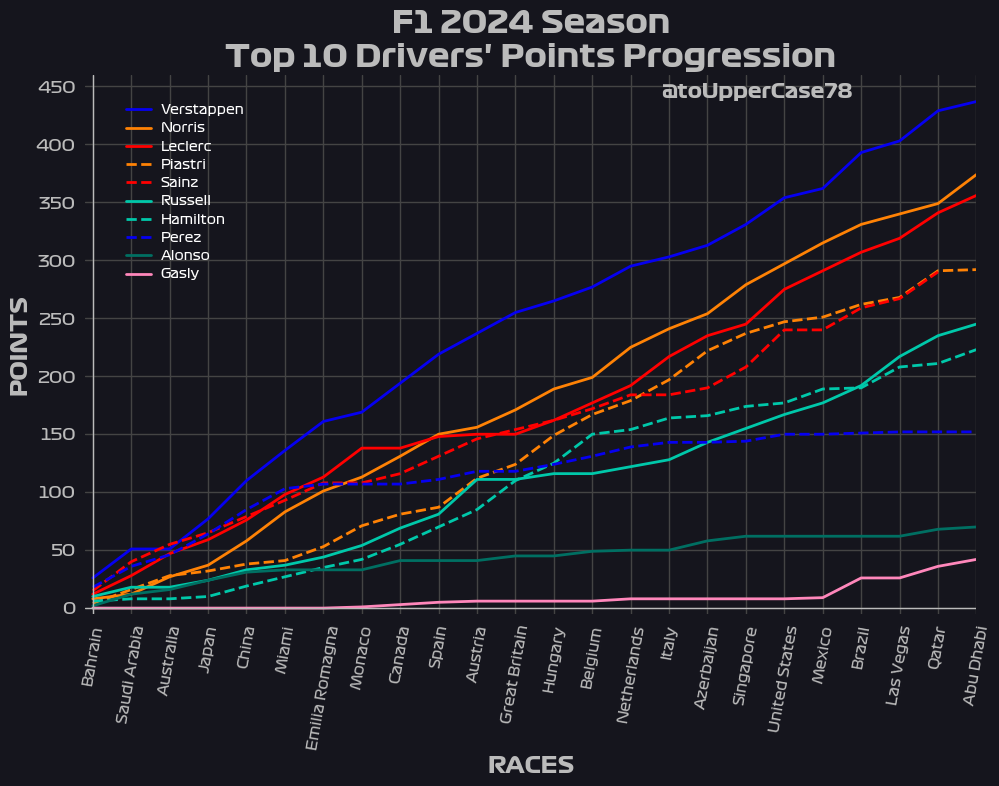

In [17]:
tracks = season2024RaceResults['Track'].unique()
tracksSprint = season2024SprintResults['Track'].unique()
plt.style.use('seaborn')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
plt.rcParams['font.family'] = 'Formula1'
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,460])
c = assign_color('drivers', driverStandingsTop10)
for i in range(10):
    if driverStandingsTop10[i] in ['Oscar Piastri', 'Carlos Sainz', 'Lewis Hamilton', 'Sergio Perez']:   ls = '--'
    else:   ls = '-'
    plt.plot(driverPointsTop10[driverStandingsTop10[i]].cumsum(), label=driverStandingsTop10[i].split()[1], 
             c=c[i], linewidth=2, ls=ls)
plt.title('F1 2024 Season\nTop 10 Drivers\' Points Progression', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(14.8, 440.0, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(range(0,460,50), range(0,460,50), fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.61), fontsize=9)
plt.show()

Ah yes, this should give us much better ideas of how, for example, **Max Verstappen** became the world champion of 2024 Season! As you can see, ignoring the first few races, the Red Bull driver always **stayed at the top** of the standings as he extended the points gap until **Canada GP** and this remained almost stable until the end of the season.

About **Lando Norris**, he started behind several rivals, but then climbed up through the standings in the subsequent races, and claimed the **2nd place** after **Spanish GP**. After that race, on the other hand, he couldn't get much closer to Verstappen's points although despite the fluctuations between their points gap among the season. Anyway, he held off **Leclerc** to become the **runner-up** of drivers' standings, being the best seasonal result so far for the Briton's F1 career.

**Charles Leclerc** mostly competed against **Red Bull** drivers, including his teammate **Sainz** within the first several races of the season, but he couldn't withstand Verstappen's and later Norris' higher championship point earnings afterwards. Therefore, the Monegasque driver pursued behind these two drivers in the remainder of the season later on and finished **3rd** in the standings.

The corresponding second drivers, I mean **Sainz** and **Piastri**, their points gap between these two were high within the first half of the season, where it made the peak at **Miami** and **Emilia Romagna GP**. Thereafter, the Australian driver closed the gap and jumped over Sainz in **Italy GP** and successfully held the **4th** position and concluded the season with just **2 points** ahead of the Ferrari driver.

There are not much to say about **Russell** and **Hamilton** as both drivers tracked behind those drivers in the whole season (they only passed **Perez** afterwards). Meanwhile, Hamilton got ahead of his teammate within the period of **Hungary and Mexico GP** weekends, but lost against the young British driver after **Brazil GP**.

For **Sergio Perez**, we stated that his points were **heavily lower** than Verstappen in the standings and got overtaken by the top teams' rivals in the next races. His plot (shown as the blue dashed one) significantly showed that he couldn't earn much points after **Miami GP** and continued along till the end the season (barely 50 points in these race weekends' period). Moreover, the line remained **almost flat** in the last six races! Could that be because he finished outside of top 10 or did not finish at all?

About the other two drivers; **Fernando Alonso** seemed to stay in the **9th** place after **Emilia Romagna GP** and failed to follow the drivers from top teams as the gap got bigger and bigger after every race weekend. In addition, there are some weekends where he scored nothing in the consecutive races and the longest period occurred between **Singapore and Las Vegas GP**. Along with that, **Pierre Gasly** should have stayed outside of top 10 in the championship standings up until **Mexico GP**. But, he performed pretty well afterwards starting from **Brazil GP** and sustained getting solid results for himself and **Alpine** in the last couple of race weekends, bringing the Frenchman to **10th** place in the standings.

## 2024 Season Constructors Standings

Now, let's head for the **constructors' standings** and see how it shaped up after 24-race-long season:

In [18]:
racePointsTeam = season2024RaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
sprintRacePointsTeam = season2024SprintResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
constructorStandings = (racePointsTeam + sprintRacePointsTeam).fillna(0).sort_values(ascending=False)
constructorStandings = pd.DataFrame(constructorStandings).reset_index()
constructorStandings['POS'] = range(1,11)
constructorStandings.set_index('POS', inplace=True)
constructorStandings

,Team,Points
POS,,
1,McLaren Mercedes,666
2,Ferrari,652
3,Red Bull Racing Honda RBPT,589
4,Mercedes,468
5,Aston Martin Aramco Mercedes,94
6,Alpine Renault,65
7,Haas Ferrari,58
8,RB Honda RBPT,46
9,Williams Mercedes,17


Yes, in this season, it's **McLaren Mercedes** which has beaten the top teams **Ferrari**, **Red Bull** and **Mercedes** factory team! The papaya-orange team seemed to bring the title fight to the end, especially with Ferrari; but the constructors' title was in their favor by just **14 points** of gap ahead.

You know what? McLaren has won this title **9th time** in their F1 history, and put an end to their **26 years** of waiting to reach the top! (i.e. their previous one was in **1998** and at that time, **Mika Hakkinen** and **David Coulthard** were the main drivers. How time flies!)

If we take this from the angle of Ferrari team, well, it was **so close to claim the title** and make all the Tifosi rejoice! Again, however, the year 2024 wasn't their year, just like the previous ones; and they're still seeking the title **since 2008**. It's heartbreaking!

By the way, **Red Bull**, which was the former title earner in 2022 and 2023 seasons, dropped down to **3rd place** this season, with a noticable points gap against the aformentioned teams. Also, **Mercedes** which had **8 consecutive constructors' title** within the last decade, finished **4th** (same as in 2023) by more than 100 points behind the Milton Keynes-based team.

About the rest, **Aston Martin** stayed at **5th** place and got away from the midifeld teams a bit far; but for them, 2024 season was not the same as what it was in 2023 where they earned **multiple podiums** with Fernando Alonso. Then, **Alpine** is coming after; as stated above, their dobule-podium finish in Brazil GP this season significantly helped them to climb the higher positions and beat **Haas** and **RB**.

**Williams** and **Kick Sauber** are the last two teams in the standings. Their final results this season, unfortunately, were worse than what they had in 2023.

## Points Progression of All Teams Throughout 2024 Season

Similar to top 10 drivers' points progression, it could be insightful to observe **how all the teams' positions have changed** after every race weekend. So, here's the corresponding plot chart below:

In [19]:
teamNames = constructorStandings['Team'].unique()
teamPoints = {};   teamPointsSprint = {}
trackTeamPtsMerged = season2024RaceResults.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = season2024SprintResults.groupby(['Track','Team'])['Points'].sum()
for team in teamNames:
    teamPoints[team] = trackTeamPtsMerged[slice(None), team].reindex(tracks).values
    teamPointsSprint[team] = trackTeamPtsSprintMerged[slice(None), team].reindex(tracksSprint).values
sp = [4, 5, 10, 18, 20, 22]
for team in teamNames:
    for i in range(len(sp)):
        teamPoints[team][sp[i]] = teamPoints[team][sp[i]] + teamPointsSprint[team][i]

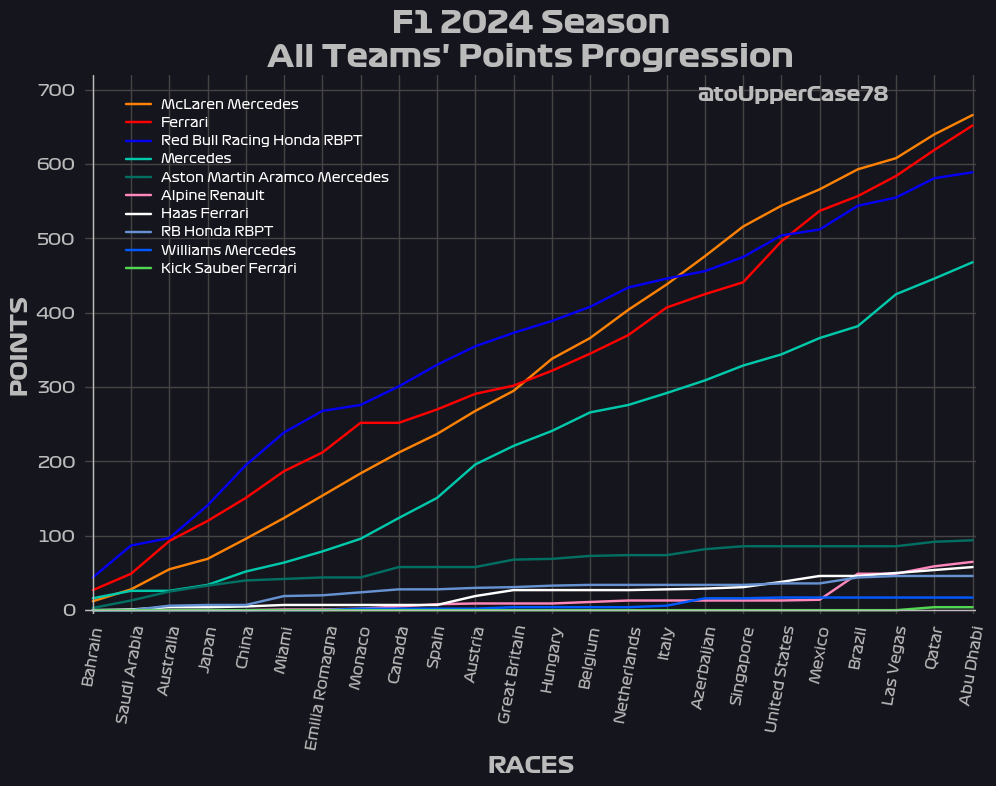

In [20]:
c = assign_color('teams', teamNames)
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,23.1,-5,720])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('F1 2024 Season\nAll Teams\' Points Progression', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(15.8, 685.0, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

And, that's how **McLaren** snatched the constructors title! The British team started the 2024 Season mostly in **3rd** place, sustained it about 10 race weekends. Then, they overtook Ferrari in **Great Britain GP**, and a couple of races later, they got ahead of Red Bull, and never gave up from the top position till the end!

Speaking of **Ferrari**, well, we couldn't see the Italian team being the leader of the standings among the 2024 Season. In the beginning, they were in **2nd** place was following behind Red Bull. Between **Hungary and United States GP**, they dropped down to 3rd place, but claimed the lost position back after **Mexico GP**. After that, although they got closer to McLaren every race weekend in the closing stage, that effort wasn't enough to reach the top position and beat their rival.

For **Red Bull**, they remained in the **1st place** in the first half of the season, aiming to claim another title for 3rd time consecutively. After **Azerbaijan GP**, however, the team was overtaken by McLaren and a few races later, they fell down to **3rd place** and got themselves away from the title fight!

Meanwhile, **Mercedes** seemed to maintain their **4th place** throughout the season (except the season opener **Bahrain GP**). The German them never had the contention for the constructors' title as they were falling against the top three teams after every Grand Prix; but at the same time, they continuously earned solid points in order to guarantee that position.

Speaking about the rest of the teams, **Aston Martin** was the best there, completing the season in **5th** place. Apparently, the team even got so close with Mercedes in **Australia and Japan GP**, but later they couldn't adapt against the top rivals in terms of championship points, thus the gap always enlarged after every race weekend.

For other teams, there aren't much to talk about as the visualization already speaks for itself. But, one important remarkable thing is about **Alpine** here; the French team leapfrogged several teams after, as said above, scoring double podium in **Brazil GP** and competed against **Haas** until the end of the season to remain in the **6th** place.

_As a side note, if we take the whole picture of this plot chart, you'll realize that **the top four teams can be clustered in their own league**, fighting for the championship title; while **the rest can be clustered in another league**, struggling to become the best midfielder, independently._

## 2024 Season Grand Prix Winners

Without further ado, below you can see **all the Grand Prix winners** of 2024 Season:

In [21]:
season2024RaceResults[season2024RaceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608
Saudi Arabia,1,Max Verstappen,Red Bull Racing Honda RBPT,1,50,1:20:43.273,25,No,1:31.773
Australia,55,Carlos Sainz,Ferrari,2,58,1:20:26.843,25,No,1:20.031
Japan,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,1:54:23.566,26,Yes,1:33.706
China,1,Max Verstappen,Red Bull Racing Honda RBPT,1,56,1:40:52.554,25,No,1:38.406
Miami,4,Lando Norris,McLaren Mercedes,5,57,1:30:49.876,25,No,1:30.980
Emilia Romagna,1,Max Verstappen,Red Bull Racing Honda RBPT,1,63,1:25:25.252,25,No,1:20.366
Monaco,16,Charles Leclerc,Ferrari,1,78,2:23:15.554,25,No,1:15.162
Canada,1,Max Verstappen,Red Bull Racing Honda RBPT,2,70,1:45:47.927,25,No,1:15.569


So, as **Max Verstappen** became the world champion of 2024 Season, it shouldn't be surprising to see him winning Grands Prix most of the time than others! According to the pattern above, the Dutch driver has successfully won **7 races in the first 10 weekends** and after a long break, he added **two more** near the end of the season. Within the table throughout, we can observe many other drivers here finishing 1st.

As discussed above, Verstappen's greatest win this season came from **Brazil GP**, starting P17 and taking the chequered flag as the first driver!

This table also showed that there are **11 race weekends** where the driver took the **pole position** and sucessfully converted this into **race win**. Likewise, in **4 different races**, the driver grabbed the win with **the fastest lap time set**.

You might wonder for **Belgium GP** that Lewis Hamilton was the winner but his gap to the leader was shown there, instead of the total race time. That's because, his teammate **George Russell** actually won the race but later disqualified (more on that below).

All right then, let's reveal **the drivers with Grand Prix wins** and their numbers:

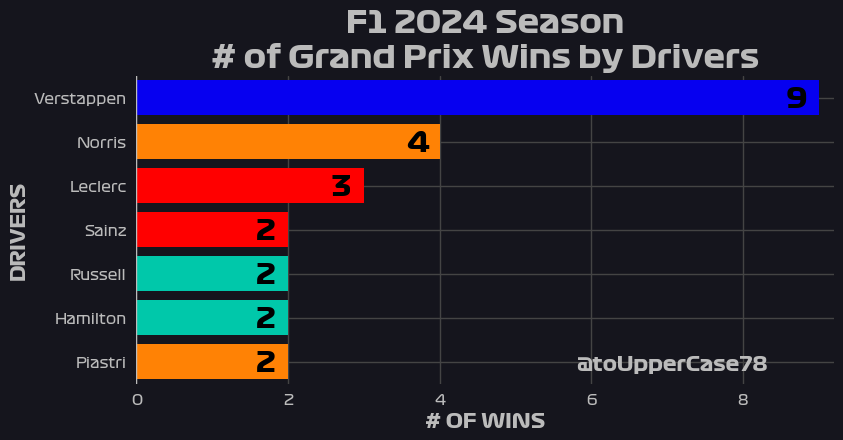

In [22]:
gpWinners = season2024RaceResults[season2024RaceResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', gpWinners.index)
plt.figure(figsize=(9.0,4))
plt.axis([0,9.2,6.5,-0.5])
plt.barh([driver.split()[1] for driver in gpWinners.index], gpWinners, color=c)
for i in range(len(gpWinners)):
    plt.text(gpWinners[i]-0.6, i+0.22, "{:>3}".format(gpWinners[i]), fontsize=20, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Grand Prix Wins by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(5.8, 6.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

As stated above, the championship-title winner **Verstappen** had the most win count this season, with **9**! His closest rival **Norris** stayed at **4** wins, then **Leclerc** with **3**. The remaining drivers achieved Grand Prix wins **twice** for the other race weekends. That is, total of **7 different drivers** have become the winners throughout the season.

Note that both McLaren drivers had their **Grand Prix wins for the first** time this season. On parallel with the table above, **Norris** took his maiden win in **Miami GP**, while **Piastri** acquired the first in his career in **Hungary GP**.

Meanwhile, it is fascinating to see **Hamilton** has scored not one but **two** wins in 2024, after having winless seasons in 2022 and 2023. Furthermore, the British driver accomplished these even more than **300 Grand Prix races** he participated since 2007 in F1! That brought his win count to **105**, extending the most career race wins record!

One thing to add among the top four teams is that for **Sergio Perez**; yeah, it is disappointing to see that the Mexican could not step on the top of the podium among all races!

Beyond these, if you take the whole picture of the visualization for 2024 Season, you'll realize that all race-winning drivers have achieved to carry this out **more than once!** Spectacular, isn't it? Yes, believe me that **this never happened before in all the previous seasons in F1 history!**

### Pole Positions

In the meantime, here are the drivers who **started the races in pole position** in all Grands Prix this season:

In [23]:
season2024PolePos = season2024RaceResults[season2024RaceResults['Starting Grid'] == 1].set_index('Track') \
    .drop('Starting Grid', axis=1)
polePos = {}
for driver in season2024PolePos['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2024PolePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,57,1:31:44.742,26,Yes,1:32.608
Saudi Arabia,1,1,Max Verstappen,Red Bull Racing Honda RBPT,50,1:20:43.273,25,No,1:31.773
Australia,NC,1,Max Verstappen,Red Bull Racing Honda RBPT,3,DNF,0,No,1:23.115
Japan,1,1,Max Verstappen,Red Bull Racing Honda RBPT,53,1:54:23.566,26,Yes,1:33.706
China,1,1,Max Verstappen,Red Bull Racing Honda RBPT,56,1:40:52.554,25,No,1:38.406
Miami,2,1,Max Verstappen,Red Bull Racing Honda RBPT,57,+7.612,18,No,1:31.261
Emilia Romagna,1,1,Max Verstappen,Red Bull Racing Honda RBPT,63,1:25:25.252,25,No,1:20.366
Monaco,1,16,Charles Leclerc,Ferrari,78,2:23:15.554,25,No,1:15.162
Canada,3,63,George Russell,Mercedes,70,+4.317,15,No,1:14.895


Oh, look at this! This season's champion **Verstappen** took the pole position **in the first 7 Grands Prix**! That's impressive!

The rest was distributed with a few more drivers out there, and the Dutchman was seen in the pole one more time (in **Austria GP**). Certainly, it seems that **Norris**' name could be seen as the pole sitter several times.

Here, in **5 different race weekends**, the driver starting on pole also **set the fastest lap time** in the race. Additionally, there were **2 races** (Australia & Great Britain) where the drivers (Verstappen & Russell) failed to finish the race despite beginning the race in P1.

If we get the drivers **being the pole sitters and their numbers**, then we obtain the bar chart below:

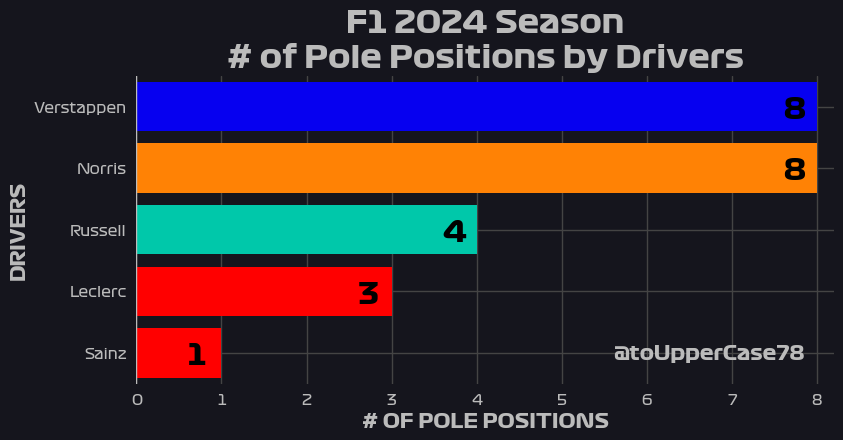

In [24]:
polePositions = pd.Series(polePos).sort_values(ascending=False)
c = assign_color('drivers', polePositions.index)
plt.figure(figsize=(9.0,4.0))
plt.axis([0,8.2,4.5,-0.5])
plt.barh([driver.split()[1] for driver in polePositions.index], polePositions, color=c)
plt.title('F1 2024 Season\n# of Pole Positions by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
for i in range(len(polePositions)):
    plt.text(polePositions[i]-0.4, i+0.19, polePositions[i], fontsize=21, fontweight='bold', color='k')
plt.text(5.6, 4.1, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF POLE POSITIONS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

So, in 2024 Season, both **Verstappen** and **Norris** achieved pole positions with a total of **8** times!

Then, **Russell**, **Leclerc** and **Sainz** are the other drivers in this list, with **4**, **3** and **1**, respectively.

In other words, all pole positions have been achieved by **only the top four teams**! Among the group, there was **none** from **Hamilton**, **Perez** and **Piastri**.

## 2024 Season Podium Finishes

After inspecting the race winners and pole sitters, let's obtain the data for the number of **podium finishes** by drivers in 2024:

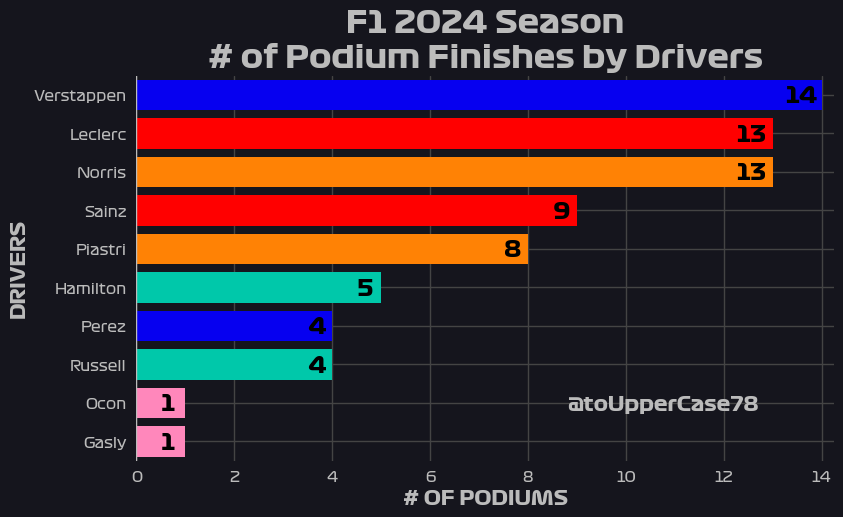

In [25]:
podiumFinishes = season2024RaceResults[season2024RaceResults['Position'].isin(['1','2','3'])]['Driver'].value_counts()
c = assign_color('drivers', podiumFinishes.index)
plt.figure(figsize=(9.0,5.0))
plt.axis([0,14.25,9.5,-0.5])
plt.barh([driver.split()[1] for driver in podiumFinishes.index], podiumFinishes, color=c)
for i in range(len(podiumFinishes)):
    if podiumFinishes[i] < 10:   pos = 0.6
    else:   pos = 0.75
    plt.text(podiumFinishes[i]-pos, i+0.2, "{:>2}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Podium Finishes by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(8.8, 8.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

As in the number of race wins above, **Verstappen also had the most podiums** this season, for a total of 14!

Then, **Leclerc** and **Norris** are the runner-ups in this list, with one less podium than the Dutchman. Their teammates (Sainz & Piastri) have stepped on the podiums with **no more than 10 times**.

Within the top four teams, **Hamilton**, **Perez** and **Russell** have fallen behind those much, with the podium count of 4 or 5.

Considering the rest, only the **Alpine drivers** (Gasly & Ocon) together successfully achieved to be in the podium ceremony just **once**! (and that double podium came from **Brazil GP**)

## 2024 Season Top 10 Finishes

Beside the podium finishes, let's make it wider to measure **the number of top 10 finishes** for all drivers in 2024 Season:

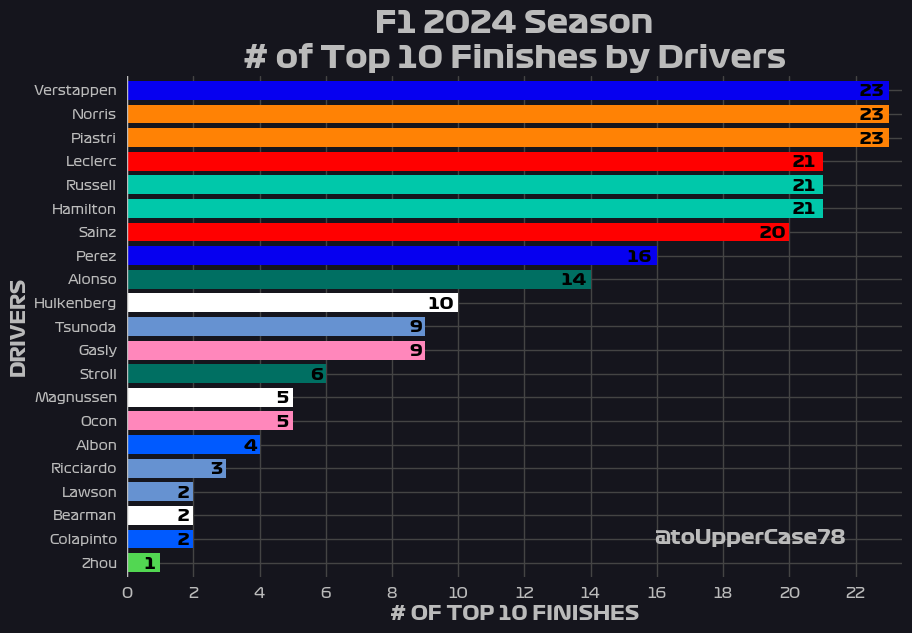

In [26]:
top10Finishes = season2024RaceResults[season2024RaceResults['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
c = assign_color('drivers', top10Finishes.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,23.4,20.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in top10Finishes.index], top10Finishes, color=c)
for i in range(len(top10Finishes)):
    if top10Finishes[i] < 10:   pos = 0.7
    else:   pos = 1.0
    plt.text(top10Finishes[i]-pos, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Top 10 Finishes by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(15.9, 19.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,24,2), range(0,24,2), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

So, **three drivers** (Verstappen, Norris & Piastri) **had the most point-scoring finishes** in all races of the season, with **23**! Then, **another trio** (Leclerc, Russell & Hamilton) were following them, with **21**.

Within the top four teams, **Sainz** and **Perez** have fallen behind of those with **20** and **16**, respectively.

Next, **Alonso** has become the best of the rest here, achieving top 10 finishes total of **14** times.

As noticed above, **Verstappen** failed to finish in the top 10 **once**, because he was DNF in **Australia** where he started on pole. What about **Norris** and **Piastri**?

In [27]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC'))
                      & (season2024RaceResults['Driver'] == 'Lando Norris')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
218,Austria,20,4,Lando Norris,McLaren Mercedes,2,64,+7 laps,0,No,1:08.016


In [28]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC'))
                      & (season2024RaceResults['Driver'] == 'Oscar Piastri')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
111,Miami,13,81,Oscar Piastri,McLaren Mercedes,6,57,+49.756,0,Yes,1:30.634


For **Leclerc, Russell** and **Hamilton**, these are the races where they finished out of top 10 or failed to do so:

In [29]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC'))
                      & (season2024RaceResults['Driver'] == 'Charles Leclerc')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
177,Canada,NC,16,Charles Leclerc,Ferrari,11,40,DNF,0,No,1:26.012
209,Austria,11,16,Charles Leclerc,Ferrari,6,71,+67.056,0,No,1:09.584
232,Great Britain,14,16,Charles Leclerc,Ferrari,11,51,+1 lap,0,No,1:29.748


In [30]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC') 
                      | (season2024RaceResults['Position'] == 'DQ'))
                      & (season2024RaceResults['Driver'] == 'George Russell')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
56,Australia,17,63,George Russell,Mercedes,7,56,DNF,0,No,1:20.284
237,Great Britain,NC,63,George Russell,Mercedes,1,33,DNF,0,No,1:31.298
259,Belgium,DQ,63,George Russell,Mercedes,6,44,1:19:57.040,0,No,1:47.113


In [31]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC'))
                      & (season2024RaceResults['Driver'] == 'Lewis Hamilton')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
57,Australia,NC,44,Lewis Hamilton,Mercedes,11,15,DNF,0,No,1:22.444
378,United States,NC,44,Lewis Hamilton,Mercedes,17,1,DNF,0,No,NaN
450,Qatar,12,44,Lewis Hamilton,Mercedes,6,57,+56.122,0,No,1:23.865


Continuing with **Sainz** and **Perez**, we obtain these race results, ending outside of top 10 or DNF:

_Additional note for Sainz that he did not race in Saudi Arabia GP due to the diagnosis with appendicitis._

In [32]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC'))
                      & (season2024RaceResults['Driver'] == 'Carlos Sainz')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
174,Canada,NC,55,Carlos Sainz,Ferrari,12,52,DNF,0,No,1:18.957
336,Azerbaijan,18,55,Carlos Sainz,Ferrari,3,49,DNF,0,No,1:46.866
414,Brazil,NC,55,Carlos Sainz,Ferrari,20,38,DNF,0,No,1:24.201


In [33]:
season2024RaceResults[((season2024RaceResults['Position'].isin([str(i) for i in range(11,21)]))
                      | (season2024RaceResults['Position'] == 'NC'))
                      & (season2024RaceResults['Driver'] == 'Sergio Perez')]

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
156,Monaco,NC,11,Sergio Perez,Red Bull Racing Honda RBPT,16,0,DNF,0,No,NaN
176,Canada,NC,11,Sergio Perez,Red Bull Racing Honda RBPT,16,51,DNF,0,No,1:18.819
235,Great Britain,17,11,Sergio Perez,Red Bull Racing Honda RBPT,20,50,+2 laps,0,No,1:29.707
335,Azerbaijan,17,11,Sergio Perez,Red Bull Racing Honda RBPT,4,49,DNF,0,No,1:47.013
395,Mexico,17,11,Sergio Perez,Red Bull Racing Honda RBPT,18,70,+1 lap,0,No,1:19.209
409,Brazil,11,11,Sergio Perez,Red Bull Racing Honda RBPT,12,69,+51.531,0,No,1:22.143
455,Qatar,NC,11,Sergio Perez,Red Bull Racing Honda RBPT,9,38,DNF,0,No,1:25.288
478,Abu Dhabi,NC,11,Sergio Perez,Red Bull Racing Honda RBPT,10,0,DNF,0,No,NaN


## 2024 Season Fastest Laps in Grands Prix

In all 24 races of 2024 Season, here you can inspect the **drivers setting the fastest lap times** of each in the table below. As in the previous seasons since 2019, the driver can **get 1 additional point** for the fastest lap time which might be crucial for their championship standings, and sometimes the teams use their strategy to steal the point from their rivals especially when there are a couple of laps remaining (**fresh soft tyres** can do the job pretty well). On the other hand, the condition for the driver is to **finish in the top 10** in order to be eligible for the point.

In [34]:
season2024RaceResults[season2024RaceResults['Set Fastest Lap'] == 'Yes'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608
Saudi Arabia,3,16,Charles Leclerc,Ferrari,2,50,+18.639,16,Yes,1:31.632
Australia,2,16,Charles Leclerc,Ferrari,4,58,+2.366,19,Yes,1:19.813
Japan,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,1:54:23.566,26,Yes,1:33.706
China,7,14,Fernando Alonso,Aston Martin Aramco Mercedes,3,56,+43.414,7,Yes,1:37.810
Miami,13,81,Oscar Piastri,McLaren Mercedes,6,57,+49.756,0,Yes,1:30.634
Emilia Romagna,7,63,George Russell,Mercedes,6,63,+47.154,7,Yes,1:18.589
Monaco,7,44,Lewis Hamilton,Mercedes,7,78,+14.908,7,Yes,1:14.165
Canada,4,44,Lewis Hamilton,Mercedes,7,70,+4.915,13,Yes,1:14.856


All in all, there were **5 different drivers in 5 different races**, with the fastest lap time but failed to obtain +1 point due to finishing outside the top 10: **Piastri** at Miami, **Alonso** at Austria, **Ricciardo** at Singapore, **Ocon** at United States and **Magnussen** at Abu Dhabi.

Furthermore, there were **only 4 weekends** where the driver winning the race also grabbed the additional point by the fastest lap time. For all of these, 3 of them came from **Max Verstappen** while the remaining one was from **Lando Norris**.

Besides this season, **Mercedes** and **McLaren** teams have achieved to set the fastest laps in **3 consecutive** race weekends: Emilia Romagna-Monaco-Canada & Netherlands-Italy-Azerbaijan, respectively.

To gather up everything, let's count **the number of fastest laps set by drivers** in the visualization below:

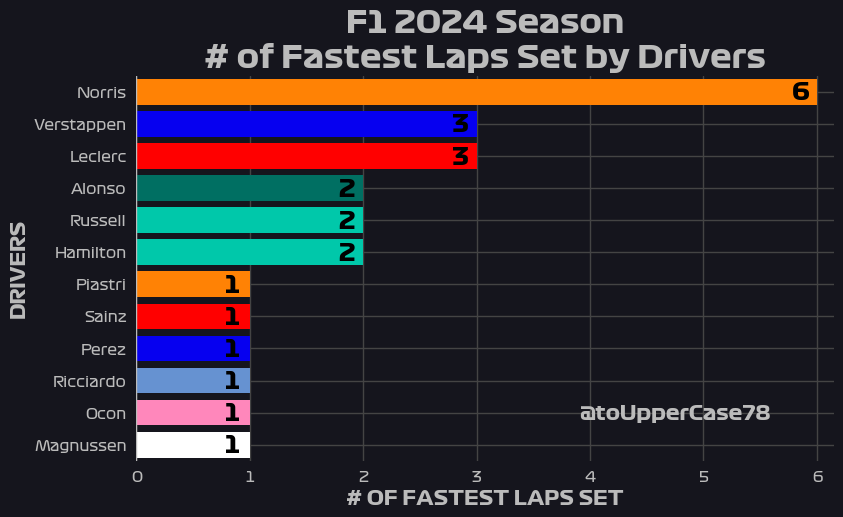

In [35]:
fastestLaps = season2024RaceResults[season2024RaceResults['Set Fastest Lap'] == 'Yes']['Driver'].value_counts()
c = assign_color('drivers', fastestLaps.index)
plt.figure(figsize=(9,5))
plt.axis([0,6.15,11.5,-0.5])
plt.barh([driver.split()[1] for driver in fastestLaps.index], fastestLaps, color=c)
for i in range(len(fastestLaps)):
    plt.text(fastestLaps[i]-0.22, i+0.25, fastestLaps[i], fontsize=17, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Fastest Laps Set by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(3.9, 10.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF FASTEST LAPS SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

According to the counts above, **Norris** set the fastest laps in **6** different race weekends; by far the most than his rivals, even **Verstappen** and **Leclerc** who did that in 3 race tracks!

His teammate, **Piastri** achieved it **only once** (that was in **Miami** but could not get the point by finishing outside of top 10).

## 2024 Season Qualifying Analysis

Here comes an important aspect of 2024 Season analyses: The qualifying sessions on Saturday.

First, let's prepare the table to show **which drivers set the fastest lap times (in Q3, of course) in qualifying** of all race weekends (I didn't say 'pole position', you'll see that why shortly):

In [36]:
season2024QualifyingResults[season2024QualifyingResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Q1,Q2,Q3,Laps
Track,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1:30.031,1:29.374,1:29.179,17
Saudi Arabia,1,Max Verstappen,Red Bull Racing Honda RBPT,1:28.171,1:28.033,1:27.472,18
Australia,1,Max Verstappen,Red Bull Racing Honda RBPT,1:16.819,1:16.387,1:15.915,21
Japan,1,Max Verstappen,Red Bull Racing Honda RBPT,1:28.866,1:28.740,1:28.197,12
China,1,Max Verstappen,Red Bull Racing Honda RBPT,1:34.742,1:33.794,1:33.660,18
Miami,1,Max Verstappen,Red Bull Racing Honda RBPT,1:27.689,1:27.566,1:27.241,18
Emilia Romagna,1,Max Verstappen,Red Bull Racing Honda RBPT,1:15.762,1:15.176,1:14.746,18
Monaco,16,Charles Leclerc,Ferrari,1:11.584,1:10.825,1:10.270,26
Canada,63,George Russell,Mercedes,1:13.013,1:11.742,1:12.000,26


Look at that! Our champion **Max Verstappen** started the 2024 Season with **fastest lap times of first 7 race weekends**!

About the remaining ones where there are varieties, we mostly see the name of **Lando Norris**, along with **Russell**, **Leclerc**, **Sainz** and the Dutchman himself; with **no more than two consecutive** occurrences.

To sum up, let's count **the total number of fastest time set** in qualifying by these drivers:

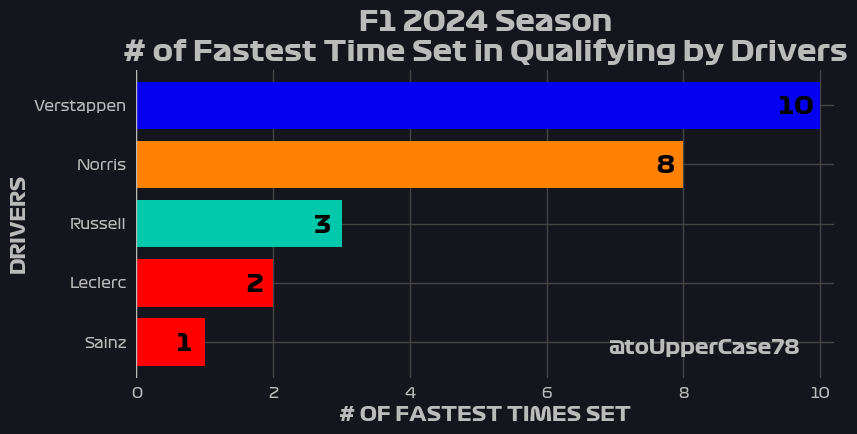

In [37]:
fastestTimeQualifying = season2024QualifyingResults[season2024QualifyingResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', fastestTimeQualifying.index)
plt.figure(figsize=(9.0,4.0))
plt.axis([0,10.2,4.6,-0.6])
plt.barh([driver.split()[1] for driver in fastestTimeQualifying.index], fastestTimeQualifying, color=c)
for i in range(len(fastestTimeQualifying)):
    if fastestTimeQualifying[i] < 10:   pos = 0.4
    else:   pos = 0.6
    plt.text(fastestTimeQualifying[i]-pos, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Fastest Time Set in Qualifying by Drivers', fontsize=20, fontweight='bold', 
          color='#bbbbbb')
plt.text(6.9, 4.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF FASTEST TIMES SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

As expected, **Verstappen** had the most ones in qualifying sessions with total of **10** different race weekends. His closest rival, **Norris** pursued him with **8** fastest lap times. The rest came from the three other drivers: Russell with, Leclerc with 2 and Sainz with 1, respectively.

On the other hand, it can be easily implied that nothing was seen from **Hamilton**, **Piastri** and **Perez**, as well as the other teams.

**BUT, WAIT HERE!** If you scroll up and check the visualization about **the number of pole positions by drivers** in 2024 Season, the numbers there **don't completely match** with those presented here! This logically indicates that **Max Verstappen lost two potential pole positions** and handed over one to **Russell** and another one to **Leclerc**. In other words, the Dutch driver **must have received grid penalties** for these two weekends before the race on Sunday.

### Cross Validation Between Fastest Lap Setter in Qualifying & Pole Sitter in Race Sessions

At this point, it's necessary to reveal all the fastest lap time setters in qualifying and all pole sitters in race sessions amongst all Grands Prix in 2024. After carefully fetching these driver information, we obtained the table below. Let's examine in **which race weekends there were differences...**

In [38]:
driverFastestTimeSetQuali = season2024QualifyingResults[season2024QualifyingResults['Position'] == '1']['Driver']
driverFastestTimeSetQuali = driverFastestTimeSetQuali.reset_index().drop('index',axis=1)
driverStartingPolePosRace = season2024RaceResults[season2024RaceResults['Starting Grid'] == 1]['Driver']
driverStartingPolePosRace = driverStartingPolePosRace.reset_index().drop('index',axis=1)
fastestLapSettersPoleSitters = pd.concat([driverFastestTimeSetQuali, driverStartingPolePosRace],axis=1)
tracks = season2024RaceResults['Track'].unique()
fastestLapSettersPoleSitters.columns = ['Driver Setting Fastest Lap in the Qualifying','Driver Being Pole Sitter in the Race']
fastestLapSettersPoleSitters = fastestLapSettersPoleSitters.set_index(tracks)
fastestLapSettersPoleSitters

,Driver Setting Fastest Lap in the Qualifying,Driver Being Pole Sitter in the Race
Bahrain,Max Verstappen,Max Verstappen
Saudi Arabia,Max Verstappen,Max Verstappen
Australia,Max Verstappen,Max Verstappen
Japan,Max Verstappen,Max Verstappen
China,Max Verstappen,Max Verstappen
Miami,Max Verstappen,Max Verstappen
Emilia Romagna,Max Verstappen,Max Verstappen
Monaco,Charles Leclerc,Charles Leclerc
Canada,George Russell,George Russell
Spain,Lando Norris,Lando Norris


**There you are!** With this cross validation implemented, those differences came from **Belgium** and **Qatar GP**! From what I've gathered through the sources of official F1 website, these are the reasons **why Verstappen lost the pole positions** in advance:

* **Belgium:** Verstappen was penalized **10 places for use of additional power unit element.** Hence, he started the race in 11th place and **Leclerc** was the pole sitter there.
* **Qatar:** Verstappen was penalized **one position for driving unnecessarily slowly** during qualifying. Well, it may look a bit silly why he did this out on track; as a consequence, **Russell** on the front row deserved to start in pole position.

Okay, that's enough about this disscussion. And now, let's turn our direction to another one, for **counting the number of Q2 appearances of all drivers** (including reserves) in all qualifying sessions:

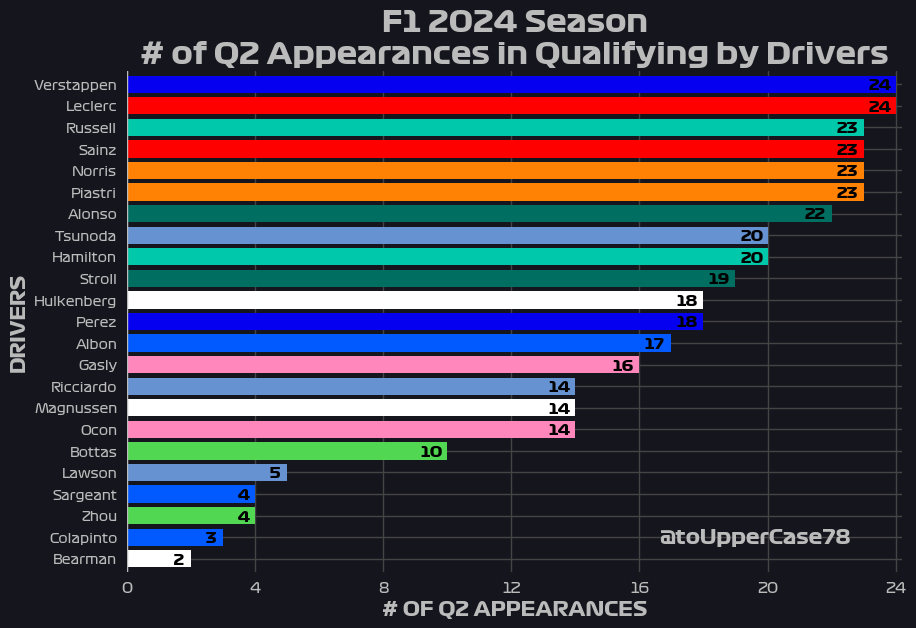

In [39]:
qualiQ2 = season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(1,16)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', qualiQ2.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,24.2,22.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ2.index], qualiQ2, color=c)
for i in range(len(qualiQ2)):
    if qualiQ2[i] < 10:   pos = 0.65
    else:   pos = 0.85
    plt.text(qualiQ2[i]-pos, i+0.24, "{:>2}".format(qualiQ2[i]), fontsize=11, fontweight='bold', color='k')
plt.title("F1 2024 Season\n# of Q2 Appearances in Qualifying by Drivers", fontsize=21, fontweight='bold', color='#bbbbbb')
plt.text(16.6, 21.3, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF Q2 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,25,4), range(0,25,4), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

From these countings above, it is revealed that only **Verstappen** and **Leclerc** have accomplished to advance to Q2 in qualifying sessions of **all** race weekends!

Behind, there are four drivers (**Russell**, **Sainz**, **Norris** & **Piastri**) who missed out Q2 only **once**.

By comparing the teammates to each other (excluding replacements and reserves) by their appearances, the largest gap is coming from **Red Bull** and **Kick Sauber** drivers, **24 vs 18** and **10 vs 4**, respectively.

If you wonder which Grand Prix these four drivers failing to go through Q2 in qualifying, here are the tracks and their positions for each:

_Carlos Sainz was not listed here because he never attended to Saudi Arabian GP this season._

In [40]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(16,21)])
                           & (season2024QualifyingResults['Driver'] == 'George Russell')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
255,Hungary,17,63,George Russell,Mercedes,1:17.968,NaN,NaN,9


In [41]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(16,21)])
                           & (season2024QualifyingResults['Driver'] == 'Lando Norris')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
334,Azerbaijan,16,4,Lando Norris,McLaren Mercedes,1:43.609,NaN,NaN,7


In [42]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(16,21)])
                           & (season2024QualifyingResults['Driver'] == 'Oscar Piastri')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
394,Mexico,17,81,Oscar Piastri,McLaren Mercedes,1:17.597,NaN,NaN,8


To make it narrower, let's continue with **counting the Q3 appearances of all drivers** in 2024 Season:

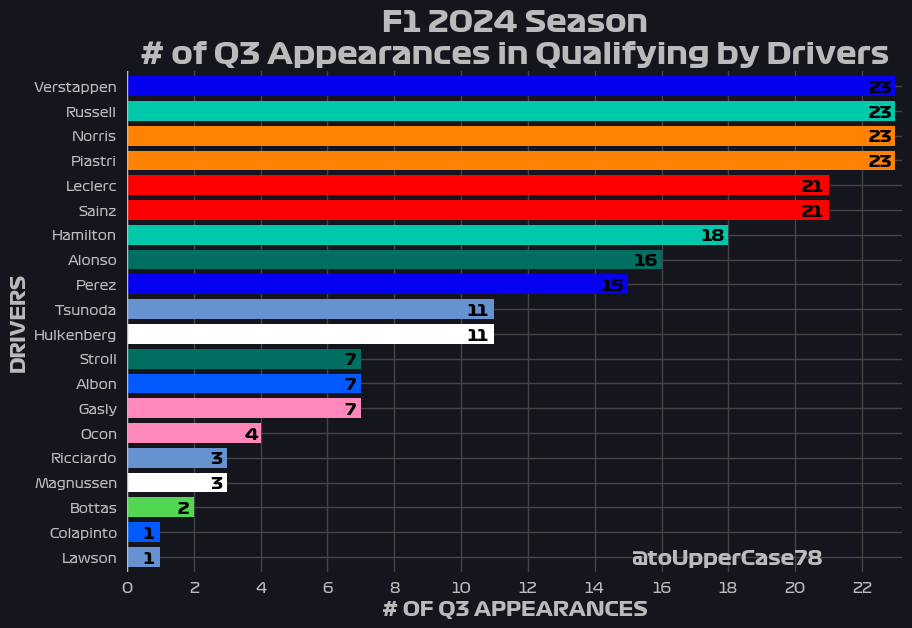

In [43]:
qualiQ3 = season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(1,11)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', qualiQ3.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,23.2,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ3.index], qualiQ3, color=c)
for i in range(len(qualiQ3)):
    if qualiQ3[i] < 10:   pos = 0.6
    else:   pos = 0.8
    plt.text(qualiQ3[i]-pos, i+0.24, "{:>2}".format(qualiQ3[i]), fontsize=12, fontweight='bold', color='k')
plt.title("F1 2024 Season\n# of Q3 Appearances in Qualifying by Drivers", fontsize=21, fontweight='bold', color='#bbbbbb')
plt.text(15.1, 19.3, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF Q3 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Here, total of **4 drivers** have achieved being in **Q3 of qualifying sessions most of the time** (23) in all race weekends!: **Verstappen**, **Russell**, **Norris** & **Piastri**.

It's interesting to observe that both **McLaren** and **Ferrari** drivers had equal amount of appearances of Q3 of qualifying, with 23 and 21, respectively.

However, for the rest of the top four teams, **Verstappen** from Red Bull and **Russell** for Mercedes outqualified their teammates (**Perez** & **Hamilton**) with large number gap; 23 vs 15 and 23 vs 18, respectively. Besides, the largest gap seemed to come from **Alonso** (Aston Martin), against **Stroll** (16 vs 7).

Well, I'd like to see which track **Verstappen** failed to finish in the top 10 of qualifying:

In [44]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(11,21)])
                           & (season2024QualifyingResults['Driver'] == 'Max Verstappen')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
409,Brazil,12,1,Max Verstappen,Red Bull Racing Honda RBPT,1:28.522,1:27.771,NaN,19


Let's also disclose for other drivers in a broad manner, too: **Leclerc, Sainz, Hamilton & Perez**

In [45]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(11,21)])
                           & (season2024QualifyingResults['Driver'] == 'Charles Leclerc')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
169,Canada,11,16,Charles Leclerc,Ferrari,1:13.107,1:12.691,NaN,21
229,Great Britain,11,16,Charles Leclerc,Ferrari,1:30.496,1:27.097,NaN,18
471,Abu Dhabi,14,16,Charles Leclerc,Ferrari,1:23.302,1:23.833,NaN,12


In [46]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(11,21)])
                           & (season2024QualifyingResults['Driver'] == 'Carlos Sainz')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
170,Canada,12,55,Carlos Sainz,Ferrari,1:13.038,1:12.728,NaN,22
411,Brazil,14,55,Carlos Sainz,Ferrari,1:30.035,1:28.158,NaN,18


In [47]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(11,21)])
                           & (season2024QualifyingResults['Driver'] == 'Lewis Hamilton')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
50,Australia,11,44,Lewis Hamilton,Mercedes,1:17.499,1:16.960,NaN,15
96,China,18,44,Lewis Hamilton,Mercedes,1:35.573,NaN,NaN,6
290,Netherlands,11,44,Lewis Hamilton,Mercedes,1:11.375,1:10.948,NaN,13
376,United States,19,44,Lewis Hamilton,Mercedes,1:34.154,NaN,NaN,6
413,Brazil,16,44,Lewis Hamilton,Mercedes,1:31.150,NaN,NaN,11
475,Abu Dhabi,18,44,Lewis Hamilton,Mercedes,1:23.887,NaN,NaN,7


In [48]:
season2024QualifyingResults[season2024QualifyingResults['Position'].isin([str(i) for i in range(11,21)])
                           & (season2024QualifyingResults['Driver'] == 'Sergio Perez')]

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
129,Emilia Romagna,11,11,Sergio Perez,Red Bull Racing Honda RBPT,1:16.404,1:15.706,NaN,10
156,Monaco,16,11,Sergio Perez,Red Bull Racing Honda RBPT,1:12.060,NaN,NaN,12
174,Canada,16,11,Sergio Perez,Red Bull Racing Honda RBPT,1:13.326,NaN,NaN,11
237,Great Britain,19,11,Sergio Perez,Red Bull Racing Honda RBPT,1:38.348,NaN,NaN,5
254,Hungary,16,11,Sergio Perez,Red Bull Racing Honda RBPT,1:17.886,NaN,NaN,6
350,Singapore,13,11,Sergio Perez,Red Bull Racing Honda RBPT,1:30.624,1:30.579,NaN,14
395,Mexico,18,11,Sergio Perez,Red Bull Racing Honda RBPT,1:17.611,NaN,NaN,9
410,Brazil,13,11,Sergio Perez,Red Bull Racing Honda RBPT,1:30.035,1:28.158,NaN,18
433,Las Vegas,16,11,Sergio Perez,Red Bull Racing Honda RBPT,1:34.155,NaN,NaN,10


## 2024 Season Sprint Sessions

The availability of Sprint sessions (both its own qualifying and race) continue with F1 2024 Season, in **6 different race weekends**, as the same number in 2023 Season.

Whether a race weekend includes Sprint sessions, the programme is set like this in 2024: On Friday, there is **only 1 Practice session**, i.e. all teams only have 60 minutes to prepare their cars and drivers in with their best effort possible. Then, the **Sprint Qualifying session** is held to determine the Sprint grid. Again, the durations of each part are 12, 10 and 8 minutes, respectively. On Saturday, it begins with the **Sprint Race session**; a few hours later, the **actual Qualifying session** is organized for the struggle of getting pole position. On Sunday, as you know, there is **the real Grand Prix race session** as usual.

There is no change applied to Sprint Races this season, such that the race distance is still roughly the **one third of the normal Grand Prix distance** (i.e. ~100 km) and expected to complete around 30 minutes. There is no need to change tyres mandatorily throughout the sprint. Still, the winner here gets **8 points**, then the second gets 7, the third get 6, going down to 8th place with 1 point.

Below you can inspect all the sprint race results of 2024, limited to top 8 places:

### China

In [49]:
season2024SprintResults[season2024SprintResults['Track'] == 'China'].drop('Track',axis=1).set_index('Position').head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,4,19,32:04.660,8
2,44,Lewis Hamilton,Mercedes,2,19,+13.043,7
3,11,Sergio Perez,Red Bull Racing Honda RBPT,6,19,+15.258,6
4,16,Charles Leclerc,Ferrari,7,19,+17.486,5
5,55,Carlos Sainz,Ferrari,5,19,+20.696,4
6,4,Lando Norris,McLaren Mercedes,1,19,+22.088,3
7,81,Oscar Piastri,McLaren Mercedes,8,19,+24.713,2
8,63,George Russell,Mercedes,11,19,+25.696,1


### Miami

In [50]:
season2024SprintResults[season2024SprintResults['Track'] == 'Miami'].drop('Track',axis=1).set_index('Position').head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,19,31:31.383,8
2,16,Charles Leclerc,Ferrari,2,19,+3.371,7
3,11,Sergio Perez,Red Bull Racing Honda RBPT,3,19,+5.095,6
4,3,Daniel Ricciardo,RB Honda RBPT,4,19,+14.971,5
5,55,Carlos Sainz,Ferrari,5,19,+15.222,4
6,81,Oscar Piastri,McLaren Mercedes,6,19,+15.750,3
7,27,Nico Hulkenberg,Haas Ferrari,10,19,+22.054,2
8,22,Yuki Tsunoda,RB Honda RBPT,15,19,+29.816,1


### Austria

In [51]:
season2024SprintResults[season2024SprintResults['Track'] == 'Austria'].drop('Track',axis=1).set_index('Position').head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,23,26:41.389,8
2,81,Oscar Piastri,McLaren Mercedes,3,23,+4.616,7
3,4,Lando Norris,McLaren Mercedes,2,23,+5.348,6
4,63,George Russell,Mercedes,4,23,+8.354,5
5,55,Carlos Sainz,Ferrari,5,23,+9.989,4
6,44,Lewis Hamilton,Mercedes,6,23,+11.207,3
7,16,Charles Leclerc,Ferrari,10,23,+13.424,2
8,11,Sergio Perez,Red Bull Racing Honda RBPT,7,23,+17.409,1


### United States

In [52]:
season2024SprintResults[season2024SprintResults['Track'] == 'United States'].drop('Track',axis=1).set_index('Position').head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,19,31:06.146,8
2,55,Carlos Sainz,Ferrari,5,19,+3.882,7
3,4,Lando Norris,McLaren Mercedes,4,19,+6.240,6
4,16,Charles Leclerc,Ferrari,3,19,+6.956,5
5,63,George Russell,Mercedes,2,19,+15.766,4
6,44,Lewis Hamilton,Mercedes,7,19,+18.724,3
7,20,Kevin Magnussen,Haas Ferrari,8,19,+25.161,2
8,27,Nico Hulkenberg,Haas Ferrari,6,19,+26.588,1


### Brazil

In [53]:
season2024SprintResults[season2024SprintResults['Track'] == 'Brazil'].drop('Track',axis=1).set_index('Position').head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,4,Lando Norris,McLaren Mercedes,2,24,29:46.045,8
2,81,Oscar Piastri,McLaren Mercedes,1,24,+0.593,7
3,16,Charles Leclerc,Ferrari,3,24,+5.656,6
4,1,Max Verstappen,Red Bull Racing Honda RBPT,4,24,+6.497,5
5,55,Carlos Sainz,Ferrari,5,24,+7.224,4
6,63,George Russell,Mercedes,6,24,+12.475,3
7,10,Pierre Gasly,Alpine Renault,7,24,+18.161,2
8,11,Sergio Perez,Red Bull Racing Honda RBPT,13,24,+18.717,1


### Qatar

In [54]:
season2024SprintResults[season2024SprintResults['Track'] == 'Qatar'].drop('Track',axis=1).set_index('Position').head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,81,Oscar Piastri,McLaren Mercedes,3,19,27:03.010,8
2,4,Lando Norris,McLaren Mercedes,1,19,+0.136,7
3,63,George Russell,Mercedes,2,19,+0.410,6
4,55,Carlos Sainz,Ferrari,4,19,+1.326,5
5,16,Charles Leclerc,Ferrari,5,19,+5.073,4
6,44,Lewis Hamilton,Mercedes,7,19,+5.650,3
7,27,Nico Hulkenberg,Haas Ferrari,9,19,+8.508,2
8,1,Max Verstappen,Red Bull Racing Honda RBPT,6,19,+10.368,1


So, these results show that **Max Verstappen** was dominant in the first sprint race in China! This continued for the next ones but with **less gaps** against the runner-up. Later, in the last two sprints, **McLaren drivers** took the wins and achieved getting the maximum points possible, while the Dutchman finished 4th and 8th place, respectively. Also, the sprint in **Qatar** seemed to be **the closest finish** among all, in terms of total gaps between drivers within points threshold.

Well, with these results in our hands, we can perform some summarizations along the way. First, let's start with **the drivers who succeeded to earn points** and the number of times they did in all sprint races:

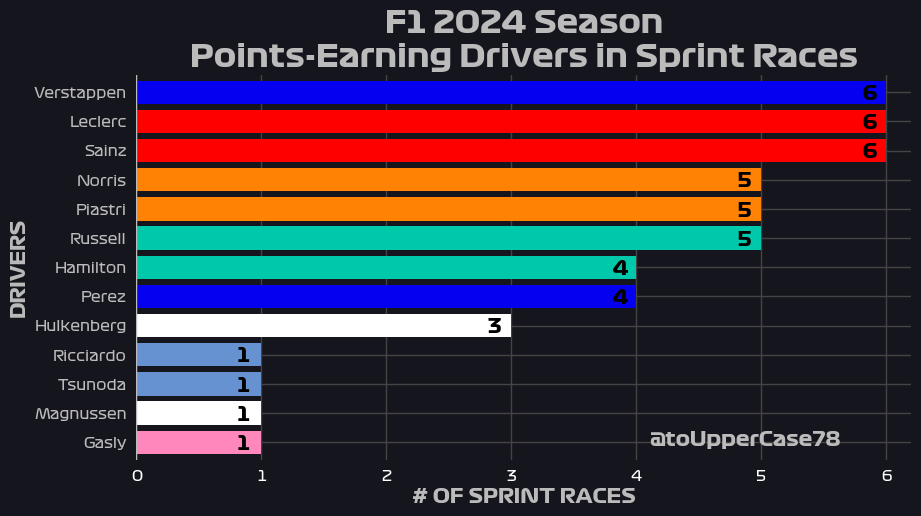

In [55]:
sprintPointScorers = season2024SprintResults[season2024SprintResults['Points'] != 0]
sprintPointScorersDriverCnt = sprintPointScorers['Driver'].value_counts()
plt.figure(figsize=(10,5))
plt.axis([0,6.2,12.6,-0.6])
for i in range(len(sprintPointScorersDriverCnt)):
    plt.text(sprintPointScorersDriverCnt[i]-0.23, i+0.25, "{:2}".format(sprintPointScorersDriverCnt[i]), 
             color='k', fontsize=14, fontweight='bold')
c = assign_color('drivers', sprintPointScorersDriverCnt.index)
plt.barh([driver.split()[1] for driver in sprintPointScorersDriverCnt.index.values], sprintPointScorersDriverCnt, color=c)
plt.text(4.1, 12.1, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.title('F1 2024 Season\nPoints-Earning Drivers in Sprint Races', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF SPRINT RACES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

According to the visual above, there are total of **13 different drivers** who earned points in Sprint Race sessions of 2024 Season.

**Verstappen**, **Leclerc** and **Sainz**; these three drivers put themselves to the top 8 in all the sprints!

Then, **Norris**, **Piastri** and **Russell** achieved to get points in 5 out of 6 sprint races. Next, **Hamilton** and **Perez** are coming behind them with 4 appearances.

Besides the drivers from top 4 teams, we can realize that the drivers of **Haas**, **RB** and **Alpine** (Gasly only) benefited from points that came from sprint sessions.

Counting the number of point scoring finishes of drivers in sprint races may not be enough to fully understand the effects of sprint sessions on the championship. That's why it is convenient to continue with the **total points earned by drivers in all sprint races** for better perception:

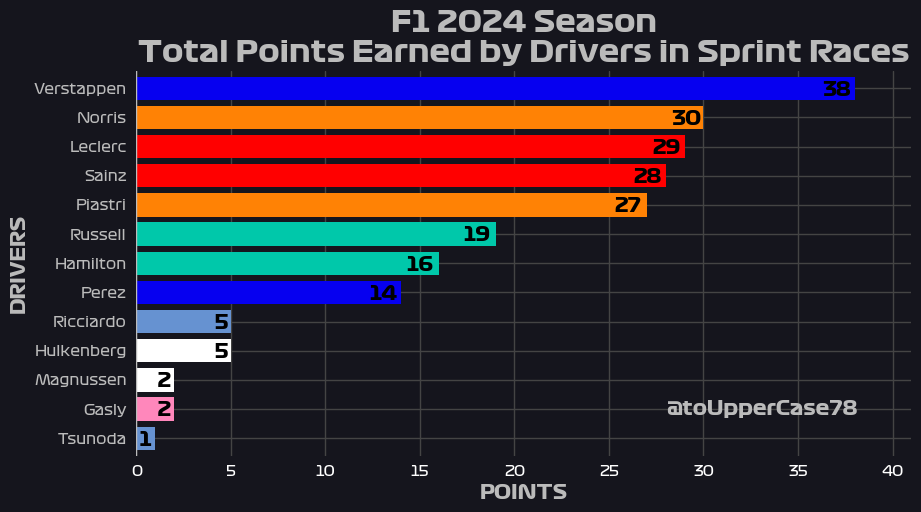

In [56]:
sprintPointScorersTotal = sprintPointScorers.groupby('Driver')['Points'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.axis([0,41.0,12.6,-0.6])
for i in range(len(sprintPointScorersTotal)):
    point = sprintPointScorersTotal[i]
    if point < 10:   pos = 1.1
    else:   pos = 1.7
    plt.text(point-pos, i+0.25, "{:2}".format(point), color='k', fontsize=14, fontweight='bold')
c = assign_color('drivers', sprintPointScorersTotal.index)
plt.barh([driver.split()[1] for driver in sprintPointScorersTotal.index.values], sprintPointScorersTotal, color=c)
plt.text(28.0, 11.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.title('F1 2024 Season\nTotal Points Earned by Drivers in Sprint Races', fontsize=21, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Ah yes, now we know that the champion **Verstappen** has earned total of **38 points** in all available sprint races of 2024 Season. As in the drivers' standings, he's also the best here!

Then, **Norris** is the second best driver with the most points from sprints with 30 points. The number goes down by 1 with the drivers **Leclerc**, **Sainz** and **Piastri**, respectively. Moreover, we can easily observe that the total points of **McLaren** and **Ferrari** are equal! They share the situation for being the teams to have the most points earned in sprint sessions.

Both Mercedes drivers, **Russell** and **Hamilton** are falling behind the aforementioned drivers, with **19** and **16** points, respectively. And, **Perez** achieved to get almost 1/3 amount of **Verstappen**'s sprint points.

About the rest, **Ricciardo** and **Hulkenberg** were the best with 5 points to contribute to their drivers' championship standings.

### Fastest Drivers of Sprint Qualifying

Lastly in this section, you might wonder which drivers were **the fastest in Sprint Qualifying sessions**. Well, you've got the answer in the table below:

In [57]:
season2024SprintQualiFastest = season2024SprintQualiResults[season2024SprintQualiResults['Position'] == 1] \
    .set_index('Track')
polePosSprint = {}
for driver in season2024SprintQualiFastest['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2024SprintQualiFastest

,Position,No,Driver,Team,Q1,Q2,Q3,Laps
Track,,,,,,,,
China,1,4,Lando Norris,McLaren Mercedes,1:36.384,1:36.047,1:57.940,13
Miami,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:28.194,1:28.001,1:27.641,12
Austria,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:05.690,1:05.186,1:04.686,11
United States,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:33.908,1:33.290,1:32.833,12
Brazil,1,81,Oscar Piastri,McLaren Mercedes,1:10.265,1:09.239,1:08.999,16
Qatar,1,4,Lando Norris,McLaren Mercedes,1:21.356,1:21.231,1:21.012,16


Here, the fastest drivers of Sprint Qualifying were only comprised from **McLaren** and **Red Bull** drivers (except Perez).

## 2024 Season DNF Analysis

Afer Sprint analyses, let's move on to **DNFs**. You already know that DNF could happen if a driver crashed into the wall; made collision with other driver; spun out and got beached in the sand; had mechanical failure in the engine part, etc.

If we take a look at the **number of DNFs by drivers** in 2024 Season, then we get this visualization below:

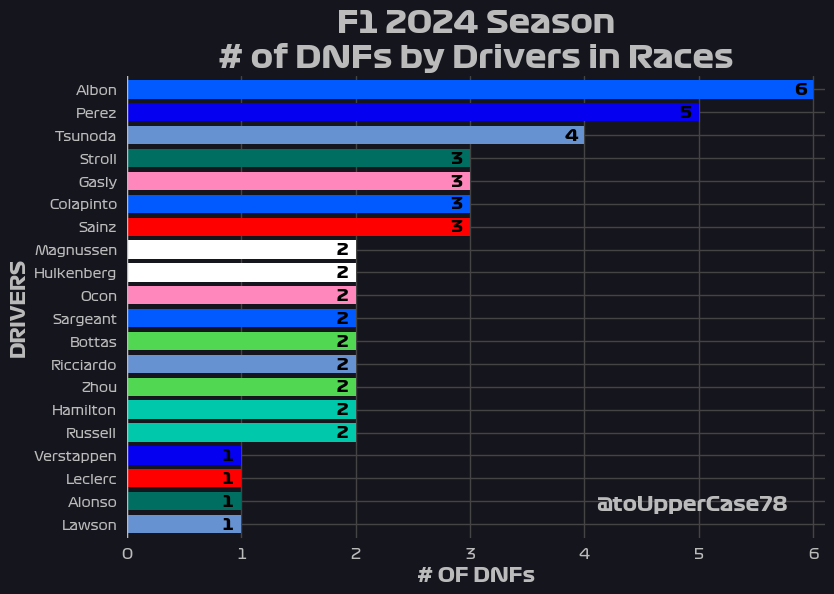

In [58]:
DNFdriver = season2024RaceResults[season2024RaceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color('drivers', DNFdriver.index)
plt.figure(figsize=(9,6))
plt.axis([0,6.1,19.6,-0.6])
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver, color=c)
plt.text(4.1, 18.4, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFdriver)):
    plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of DNFs by Drivers in Races', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

Here, it was unveiled that **Alexander Albon**, unfortunately, had the most DNFs than any other drivers (total of **6** times)! When the DNFs of all Williams drivers were added together (i.e. with Sargeant and Colapinto), the team had **11 DNFs** with their cars, which seemed to be the highest among all teams!

Then, **Perez** from Red Bull failed to complete in 5 different races, while **Verstappen** experienced this only once.

After these two, the Japanese driver **Tsunoda** could not see the chequered flag in 4 different race weekends.

For Ferrari, **Sainz** (3) and **Leclerc** (1) retired from races total of 4 times. For Mercedes, **Hamilton** and **Russell** had equal amount of DNFs (with 2).

In contrast, you might be surprised that this season's constructors' champion team **McLaren**, as well as the drivers **Norris** and **Piastri** never became DNF!

If you wonder which races **Albon** got DNF, here's the list for the answer (Japan and Mexico seemed to be the worst):

In [59]:
DNFall = season2024RaceResults[season2024RaceResults['Time/Retired'] == 'DNF']
DNFall[DNFall['Driver'] == 'Alexander Albon'].drop(['Position','No','Driver','Team'], axis=1)

,Track,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
78,Japan,14,0,DNF,0,No,NaN
138,Emilia Romagna,14,51,DNF,0,No,1:21.274
175,Canada,10,52,DNF,0,No,1:19.359
358,Singapore,11,15,DNF,0,No,1:36.888
397,Mexico,9,0,DNF,0,No,NaN
437,Las Vegas,17,25,DNF,0,No,1:38.008


For **Perez**, here's the list where he was out; in Monaco and Abu Dhabi, he was forced to retire on lap 1:

In [60]:
DNFall[DNFall['Driver'] == 'Sergio Perez'].drop(['Position','No','Driver','Team'], axis=1)

,Track,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
156,Monaco,16,0,DNF,0,No,NaN
176,Canada,16,51,DNF,0,No,1:18.819
335,Azerbaijan,4,49,DNF,0,No,1:47.013
455,Qatar,9,38,DNF,0,No,1:25.288
478,Abu Dhabi,10,0,DNF,0,No,NaN


Let's also reveal for **Tsunoda**:

In [61]:
DNFall[DNFall['Driver'] == 'Yuki Tsunoda'].drop(['Position','No','Driver','Team'], axis=1)

,Track,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
97,China,19,26,DNF,0,No,1:41.593
318,Italy,16,7,DNF,0,No,1:26.198
338,Azerbaijan,11,14,DNF,0,No,1:50.887
398,Mexico,11,0,DNF,0,No,NaN


As we examined the DNFs by drivers, how about the **number of DNFs in all race tracks** in 2024?

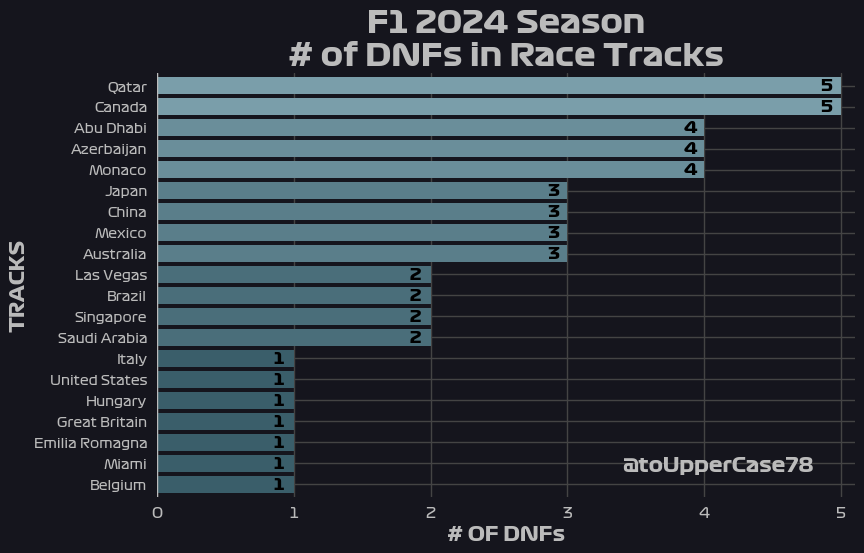

In [62]:
DNFtrack = season2024RaceResults[season2024RaceResults['Time/Retired'] == 'DNF']['Track'].value_counts()
c = []
for i in range(len(DNFtrack)):
    if DNFtrack[i] == 5:    c.append('#7a9eaa')
    elif DNFtrack[i] == 4:  c.append('#6a8e9a')
    elif DNFtrack[i] == 3:  c.append('#5a7e8a')
    elif DNFtrack[i] == 2:  c.append('#4a6e7a')
    elif DNFtrack[i] == 1:  c.append('#3a5e6a')
plt.figure(figsize=(9,5.5))
plt.axis([0,5.1,19.6,-0.6])
plt.barh(DNFtrack.index, DNFtrack, color=c)
plt.title('F1 2024 Season\n# of DNFs in Race Tracks', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(3.4, 18.4, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFtrack)):
    plt.text(DNFtrack[i]-0.15, i+0.23, DNFtrack[i], fontsize=12, fontweight='bold', color='k')
plt.xlabel('# OF DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TRACKS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

Here, **Qatar** and **Canada GP** have got the most DNFs on the tracks with 5! Next, there were 4 cars retired in **Abu Dhabi**, **Azerbaijan** and **Monaco GP**.

The list goes with number of DNFs down 3, 2 and 1, respectively. As a result, if we sum all the numbers of DNFs here, then there are totally **49 DNFs** occurred in 2024 Season.

In addition, yes, there are other race weekends where no DNF happened at all (i.e. all drivers completed their, even those with at least 1 lap down): **Bahrain**, **Spain**, **Austria**, **Nerherlands**

Speaking of **Qatar** and **Canada**, being the GPs with the highest number of DNFs, here are the drivers who were out of the races:

In [63]:
DNFall[DNFall['Track'] == 'Qatar'].drop(['Track','Position'], axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
454,27,Nico Hulkenberg,Haas Ferrari,18,39,DNF,0,No,1:25.767
455,11,Sergio Perez,Red Bull Racing Honda RBPT,9,38,DNF,0,No,1:25.288
456,18,Lance Stroll,Aston Martin Aramco Mercedes,15,8,DNF,0,No,1:30.935
457,43,Franco Colapinto,Williams Mercedes,19,0,DNF,0,No,NaN
458,31,Esteban Ocon,Alpine Renault,20,0,DNF,0,No,NaN


In [64]:
DNFall[DNFall['Track'] == 'Canada'].drop(['Track','Position'], axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
174,55,Carlos Sainz,Ferrari,12,52,DNF,0,No,1:18.957
175,23,Alexander Albon,Williams Mercedes,10,52,DNF,0,No,1:19.359
176,11,Sergio Perez,Red Bull Racing Honda RBPT,16,51,DNF,0,No,1:18.819
177,16,Charles Leclerc,Ferrari,11,40,DNF,0,No,1:26.012
178,2,Logan Sargeant,Williams Mercedes,13,23,DNF,0,No,1:26.484


### Did Not Start

Beyond the DNF, perhaps one of the worst thing is to **not start the race on Sunday** at all!

In 2024, there were **3 DNS incidents in 2 different tracks**, as listed below. Do you remember what happened to cause them to not place themselves on the grid before the lights out?

In [65]:
season2024RaceResults[season2024RaceResults['Time/Retired'] == 'DNS'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Great Britain,NC,10,Pierre Gasly,Alpine Renault,19,0,DNS,0,No,NaN
Brazil,NC,23,Alexander Albon,Williams Mercedes,7,0,DNS,0,No,NaN
Brazil,NC,18,Lance Stroll,Aston Martin Aramco Mercedes,10,0,DNS,0,No,NaN


### Disqualified

Likewise, **being disqualified** is another incident that no driver wants to experience!

There were **2 disqualifications** occurred in 2024 Season. Here's why:

* In Belgium, **George Russell** was taken out from the race results, because his car was found **underweighted** according to the scrutiny by FIA after the race, although the Briton crossed the finish line in 1st place!
* In Brazil, **Nico Hulkenberg** was black-flagged after receiving physical assistances from the track marshals for rescuing the car after the spin.

In [66]:
season2024RaceResults[season2024RaceResults['Position'] == 'DQ'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Belgium,DQ,63,George Russell,Mercedes,6,44,1:19:57.040,0,No,1:47.113
Brazil,DQ,27,Nico Hulkenberg,Haas Ferrari,18,0,DSQ,0,No,1:23.764


### Did Not Finish but Classified

Another thing is that any driver **who became DNF could be classified** in the race results sheet, by completing at least 90% of the race distance. For this reason, there were **6 different drivers in 4 race tracks** who retired in the closing stages of the race sessions but put themselves in the classifications:

In [67]:
season2024RaceResults[(season2024RaceResults['Time/Retired'] == 'DNF') & (season2024RaceResults['Position'] != 'NC')] \
    .set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Australia,17,63,George Russell,Mercedes,7,56,DNF,0,No,1:20.284
Azerbaijan,17,11,Sergio Perez,Red Bull Racing Honda RBPT,4,49,DNF,0,No,1:47.013
Azerbaijan,18,55,Carlos Sainz,Ferrari,3,49,DNF,0,No,1:46.866
Azerbaijan,19,18,Lance Stroll,Aston Martin Aramco Mercedes,13,45,DNF,0,No,1:48.148
Singapore,19,20,Kevin Magnussen,Haas Ferrari,14,57,DNF,0,No,1:37.425
Abu Dhabi,17,30,Liam Lawson,RB Honda RBPT,12,55,DNF,0,No,1:28.751


## 2024 Season Driver of the Day Votes

**Driver of the Day** award has been given to drivers since 2016. The voting is carried out by the fans worldwide during the Grand Prix weekends and announced at the end of the race session on Sunday. Of course, the objective is to honor the driver who generally showed the superior performance out on track and drew the most attention for what was done against the opponents.

In the table below, you see the whole results of the Drivers of the Day votes in all races of 2024 Season, including the top 5 drivers and their vote percentages. There may be some patterns to catch, though:

In [68]:
season2024DotdVotes

,1st Place,1st Place(%),2nd Place,2nd Place(%),3rd Place,3rd Place(%),4th Place,4th Place(%),5th Place,5th Place(%)
Track,,,,,,,,,,
Bahrain,Carlos Sainz,31.4,Max Verstappen,13.3,Sergio Perez,11.4,Charles Leclerc,8.0,Lando Norris,5.2
Saudi Arabia,Oliver Bearman,48.3,Lewis Hamilton,7.3,Kevin Magnussen,6.7,Sergio Perez,5.9,Lando Norris,5.2
Australia,Carlos Sainz,38.4,Lando Norris,11.6,Oscar Piastri,10.2,Charles Leclerc,8.7,Max Verstappen,5.5
Japan,Charles Leclerc,23.8,Yuki Tsunoda,17.7,Carlos Sainz,14.6,Sergio Perez,8.3,Lando Norris,8.0
China,Lando Norris,26.4,Lewis Hamilton,13.9,Fernando Alonso,13.6,Charles Leclerc,9.0,Max Verstappen,6.3
Miami,Lando Norris,41.1,Valtteri Bottas,14.6,Oscar Piastri,8.5,Lewis Hamilton,5.9,Charles Leclerc,4.6
Emilia Romagna,Lando Norris,31.4,Charles Leclerc,11.3,Oscar Piastri,9.0,Max Verstappen,8.6,Yuki Tsunoda,6.5
Monaco,Charles Leclerc,32.4,Guanyu Zhou,12.4,Oscar Piastri,7.9,Carlos Sainz,6.4,Lando Norris,4.7
Canada,Lando Norris,24.7,Max Verstappen,11.8,Lewis Hamilton,9.5,George Russell,9.0,Oscar Piastri,6.6


From this table, we can get these implications:

* **Lando Norris** had triple DotD-award streak twice (China-Miami-Emilia Romagna, Canada-Spain-Austria)!
* The **highest vote** (48.3%) among all DotD awards given was happened in **Saudi Arabia GP** for **Oliver Bearman** who raced for Ferrari by replacing Carlos Sainz at that weekend and brilliantly finished 7th!
* That weekend in Saudi Arabia GP was also the one such that the vote gap **between the 1st and 2nd was the highest** (48.3% vs 7.3%).
* On the contrary, the **lowest vote** rate for giving the DotD award was occurred in **Singapore GP**, where **Daniel Ricciardo** was selected as DotD in his last Grand Prix weekend. Plus, it was the one with the lowest gap between 1st and 2nd place (with 20.1% vs 17.8%).
* Although **Max Verstappen** achieved multiple pole positions, race winds, podiums this season, he was awarded as DotD only **once**! (in Brazil)
* Within the top 4 teams, **George Russell** and **Sergio Perez** were never selected as DotD in all races.
* **Guanyu Zhou** claimed this award in the penultimate race (Qatar GP) of 2024 Season; that was the one where the Chinese driver earned points for himself and Kick Sauber by finishing 8th!

To enrich this analysis further, let's **count the number of awards** each eligible driver has received in 2024 Season:

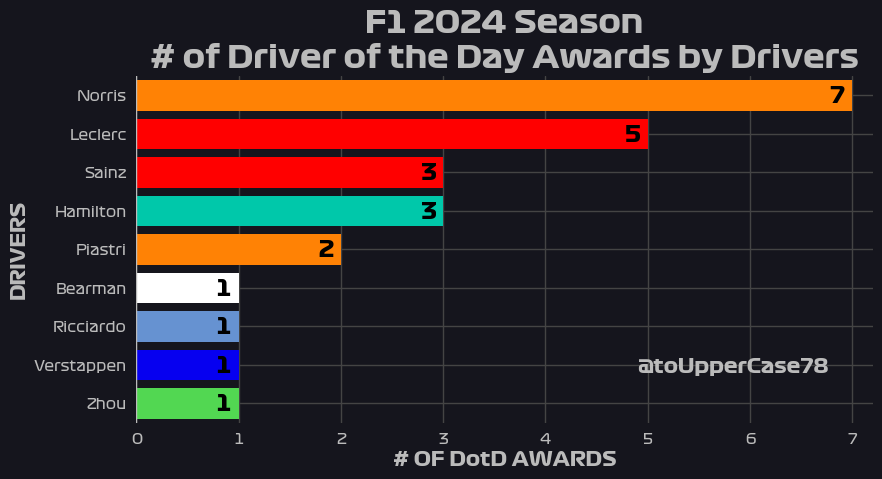

In [69]:
DotdAwards = season2024DotdVotes['1st Place'].value_counts()
c = assign_color('drivers', DotdAwards.index)
plt.figure(figsize=(9.5,4.5))
plt.axis([0,7.2,8.5,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAwards.index], DotdAwards, color=c)
for i in range(len(DotdAwards)):
    plt.text(DotdAwards[i]-0.22, i+0.2, DotdAwards[i], fontsize=16, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Driver of the Day Awards by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(4.9, 7.2, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF DotD AWARDS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Here, it's not hard to see that total of **9** different drivers have become the Driver of the Day.

In all 24 race weekends, **Norris** had the most DotD award than any other drivers (with 7) while his teammate **Piastri** got this twice (in Hungary & Azerbaijan).

Then, Ferrari drivers are coming after the British driver; **Leclerc** and **Sainz** deserved this award total of 5 and 3 times, respectively.

For Mercedes, **Hamilton** was honored to be the DotD **three times** (Great Britain, Belgium & Las Vegas); on the other hand, **Russell** has not received any.

The other drivers are **Bearman**, **Ricciardo**, **Verstappen** and **Zhou** with one time.

To make it broader, let's also **count all the top 5 places** of DotD votes of all race weekends:

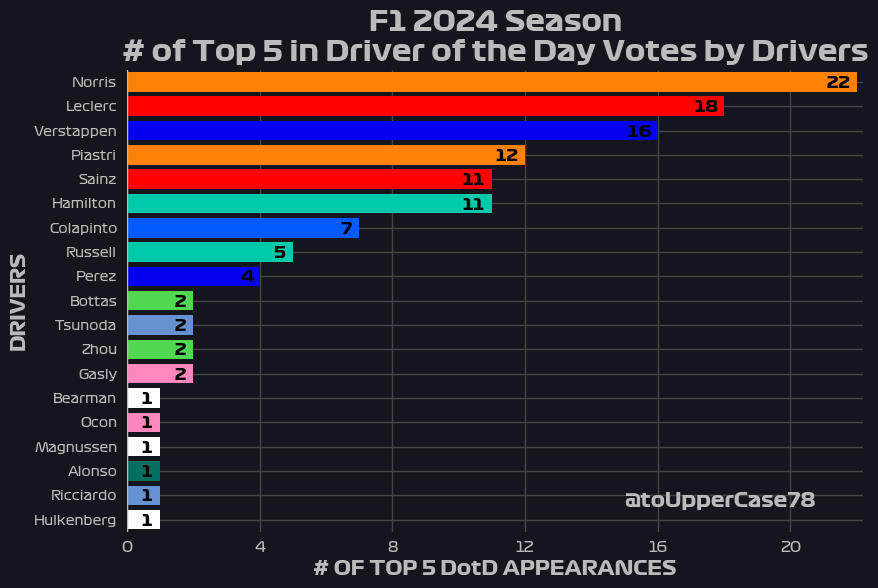

In [70]:
DotdAppearance = {}
for place in range(5):
    for driver in range(len(season2024DotdVotes)):
        d = season2024DotdVotes.iloc[driver,place*2]
        if d not in DotdAppearance.keys():   DotdAppearance[d] = 1
        else:   DotdAppearance[d] += 1
DotdAppearanceDf = pd.Series(DotdAppearance).sort_values(ascending=False)
c = assign_color('drivers', DotdAppearanceDf.index)
plt.figure(figsize=(9.5,6))
plt.axis([0,22.2,18.5,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAppearanceDf.index], DotdAppearanceDf, color=c)
for i in range(len(DotdAppearanceDf)):
    if DotdAppearanceDf[i] < 10:   pos = 0.8
    else:   pos = 1.0
    plt.text(DotdAppearanceDf[i]-pos, i+0.25, "{:>3}".format(DotdAppearanceDf[i]), fontsize=12, fontweight='bold', color='k')
plt.title('F1 2024 Season\n# of Top 5 in Driver of the Day Votes by Drivers', fontsize=20, 
          fontweight='bold', color='#bbbbbb')
plt.text(15, 17.5, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF TOP 5 DotD APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,24,4), range(0,24,4), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

So, counting the top 5 drivers in all Driver of the Day votes made some differences compared to the previous one, didn't it?

Well, **Norris** again is on the top, with 22 different race weekends he placed in the top 5 of the votings!

2024 Season champion **Verstappen** has appeared a total of 16 times. Between him and Norris, there is **Charles Leclerc** with total of 18 appearances in DotD votings.

The other drivers with more than 10 top 5 DotD appearances are **Piastri**, **Sainz** and **Hamilton**.

Interestingly, we saw **Franco Colapinto**, who replaced Sargeant from Williams in the mid-season, listed in the top 5 of DotD in 7 different race weekends, even surpassing **Russell** and **Perez**!

## 2024 Season Total Laps & Race Distances Driven in Race Sessions

Now, let's examine an interesting and insightful analysis for all drivers (including reserves) and teams in 2024 Season: The disclosure of **total laps** and **race distances** driven in race sessions:

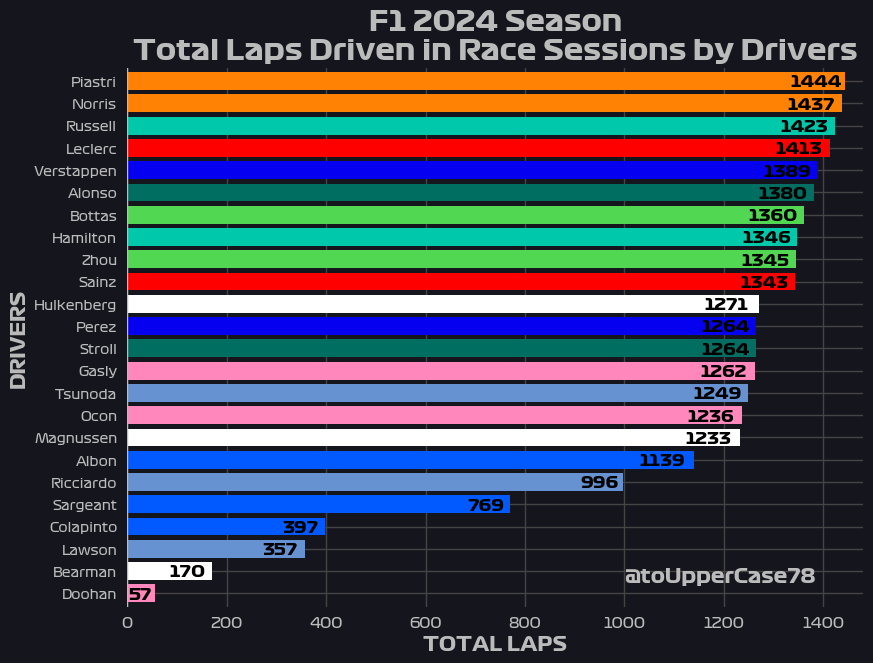

In [71]:
driversTotalLaps = season2024RaceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)
c = assign_color('drivers', driversTotalLaps.index)
plt.figure(figsize=(9.5,7.0))
plt.axis([0,1480,23.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalLaps.index], driversTotalLaps, color=c)
for i in range(len(driversTotalLaps)):
    if driversTotalLaps[i] < 100:   pos = 55
    elif driversTotalLaps[i] < 1000:   pos = 85
    else:   pos = 110
    plt.text(driversTotalLaps[i]-pos, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')
plt.title('F1 2024 Season\nTotal Laps Driven in Race Sessions by Drivers', fontsize=20, fontweight='bold', 
          color='#bbbbbb')
plt.text(1000, 22.5, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

As you can expect, **Piastri** and **Norris** drove the most laps in this 24-race-long season, as **they had no DNFs** among all of them (check this with the related analysis above)!

**BUT, WAIT A MINUTE!** Despite no DNFs, how was Lando Norris supposed to **go 7 laps less** than his teammate? There has to be an explanation for that! Well, let me explain: In **Austrian GP**, Lando and Verstappen had close battles several times on the track, and later, the Briton had to retire early due to damages to his car. This should've been considered as a DNF; however, according to the official race results, he **completed the race with 7 laps down** as 20th place and was classified (plus he wasn't marked as DNF; you may check this in the related analysis above)!

Let's continue... From these outcomes, **Russell** and **Leclerc** are coming after the McLaren drivers, with more than 1400 laps driven.

By the way, our champion **Verstappen** was the 5th driver here to drive **1389** laps race sessions, while his teammate **Perez** stayed down much below with **1264**.

For Williams, **Albon** was at the bottom among all full-season drivers, with the least laps (1139). That's because he got the most DNFs than any other drivers this season. Strangely enough, if we sum the total laps of his teammates (Sargeant & Colapinto) together, these two **drove more laps** than the Thai driver (which is 1166)! 

Similarly, **Tsunoda** from RB team, despite participating in all grand prix weekends, has driven less laps (1249) than his teammates (Ricciardo & Lawson) in 2024 when we add their total laps (which is 1353)!

If we switch to the teams, then we obtain this visualization below for total laps driven:

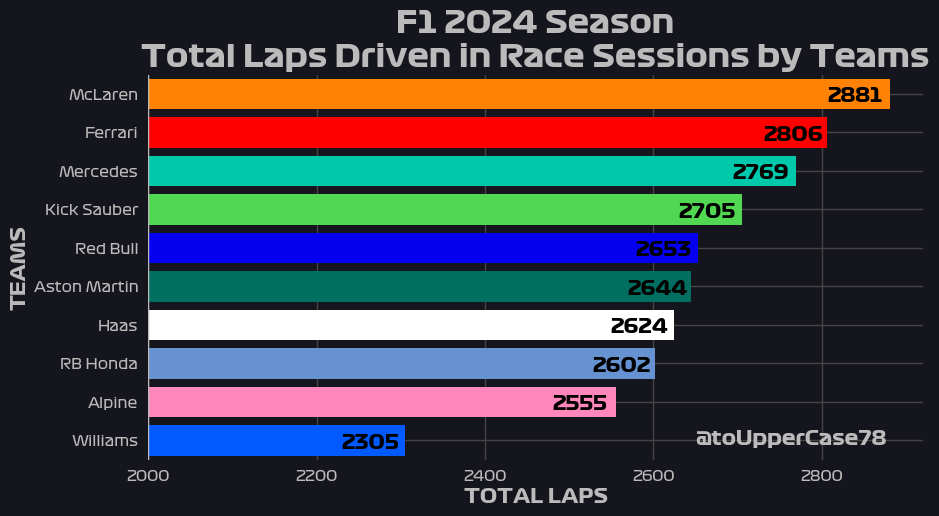

In [72]:
teamsTotalLaps = season2024RaceResults.groupby('Team')['Laps'].sum().sort_values(ascending=False)
c = assign_color('teams', teamsTotalLaps.index)
plt.figure(figsize=(10,5))
plt.axis([2000,2920,9.5,-0.5])
teamLabel = [" ".join(team.split()[:2]) if len(team.split()) > 2 else team.split()[0] for team in teamsTotalLaps.index]
plt.barh(teamLabel, teamsTotalLaps, color=c)
for i in range(len(teamsTotalLaps)):
    plt.text(teamsTotalLaps[i]-75, i+0.2, teamsTotalLaps[i], fontsize=14, fontweight='bold', color='k')
plt.title('F1 2024 Season\nTotal Laps Driven in Race Sessions by Teams', fontsize=22, fontweight='bold', 
           color='#bbbbbb')
plt.text(2650, 9.1, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TEAMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(2000, color='#bbbbbb')
plt.show()

Yeah, **McLaren** is the team with no DNFs occurred in all race sessions. As we stated for their drivers above, so the same goes with this team, too, with **the most laps driven** compared to all their rivals (2881 laps)!

Then, **Ferrari** is the runner-up in this outcome with 2806 laps and **Mercedes** is the 3rd best here with 2769 laps.

**Kick Sauber** surprisingly overtakes **Red Bull**, driving 52 laps more than the dark-blue color team!

Moreover, as expected, **Williams** is the dead last here, because of multiple DNFs they've got the most throughout the season (2305 laps), which is exactly 250 laps than Alpine!

Back to the drivers, now let's calculate the **total race distance driven** (in kilometers) for each of them:

_For this to work, all drivers' laps driven amount of every race session were taken and multiplied by the circuit length of each track individually. In order to get the most accurate results, some adjustments had to be done below, due to several reserve drivers and replacements occurred in 2024 Season._

In [73]:
trackDistance = season2024RaceCalendar['Circuit Length(km)'].values
drivers = season2024RaceResults['Driver'].unique()
driversLaps = {}
for driver in drivers:
    driversLaps[driver] = season2024RaceResults[season2024RaceResults['Driver'] == driver]['Laps'].values
driversLaps['Carlos Sainz'] = np.insert(driversLaps['Carlos Sainz'], 1, 0)
driversLaps['Esteban Ocon'] = np.append(driversLaps['Esteban Ocon'], 0)
driversLaps['Kevin Magnussen'] = np.insert(driversLaps['Kevin Magnussen'], 16, 0)
driversLaps['Kevin Magnussen'] = np.insert(driversLaps['Kevin Magnussen'], 20, 0)
driversLaps['Oliver Bearman'] = np.insert(driversLaps['Oliver Bearman'], 0, 0)
driversLaps['Logan Sargeant'] = np.insert(driversLaps['Logan Sargeant'], 2, 0)
for _ in range(6):   driversLaps['Daniel Ricciardo'] = np.append(driversLaps['Daniel Ricciardo'], 0)
for _ in range(14):  driversLaps['Oliver Bearman'] = np.insert(driversLaps['Oliver Bearman'], 2, 0)
for _ in range(3):   driversLaps['Oliver Bearman'] = np.insert(driversLaps['Oliver Bearman'], 17, 0)
for _ in range(3):   driversLaps['Oliver Bearman'] = np.append(driversLaps['Oliver Bearman'], 0)
for _ in range(15):  driversLaps['Franco Colapinto'] = np.insert(driversLaps['Franco Colapinto'], 0, 0)
for _ in range(18):  driversLaps['Liam Lawson'] = np.insert(driversLaps['Liam Lawson'], 0, 0)
for _ in range(9):   driversLaps['Logan Sargeant'] = np.append(driversLaps['Logan Sargeant'], 0)
for _ in range(23):  driversLaps['Jack Doohan'] = np.insert(driversLaps['Jack Doohan'], 0, 0)
driversDist = {}
for driver in driversLaps.keys():
    driversDist[driver] = round((driversLaps[driver] * trackDistance).sum(), 2)
driversTotalDist = pd.Series(driversDist).sort_values(ascending=False)

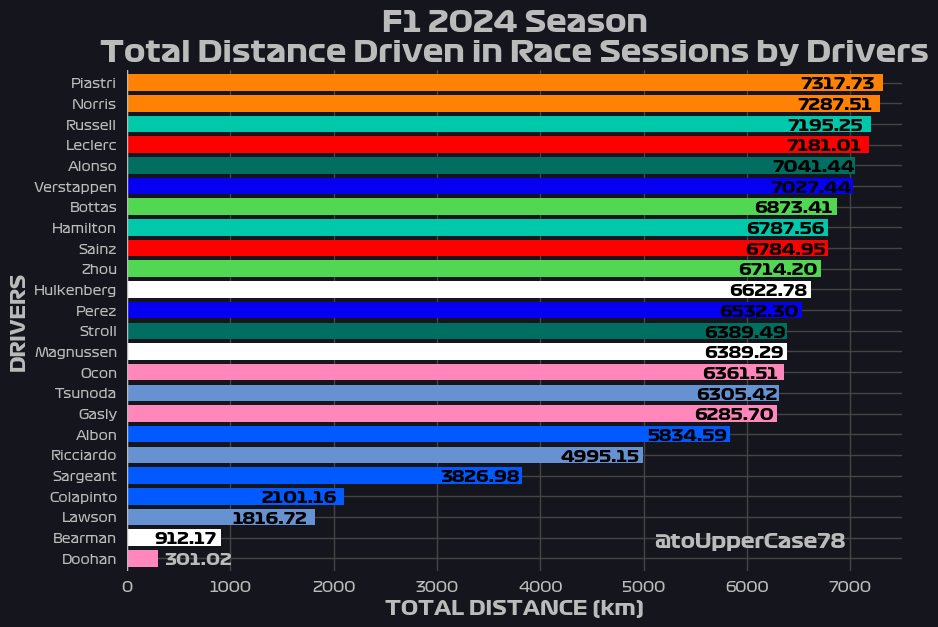

In [74]:
c = assign_color('drivers', driversTotalDist.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,7500,23.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalDist.index], driversTotalDist, color=c)
for i in range(len(driversTotalDist)):
    if driversTotalDist[i] < 500:   pos = -60;   color = '#bbbbbb'
    elif driversTotalDist[i] < 1000:   pos = 650;   color = 'k'
    else:   pos = 800;   color = 'k'
    plt.text(driversTotalDist[i]-pos, i+0.3, "{:4.2f}".format(driversTotalDist[i]), fontsize=12, fontweight='bold', color=color)
plt.title('F1 2024 Season\nTotal Distance Driven in Race Sessions by Drivers', fontsize=21, fontweight='bold', 
          color='#bbbbbb')
plt.text(5100, 22.5, '@toUpperCase78', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOTAL DISTANCE (km)', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

Well, don't be surprised to see the **McLaren** drivers at the top of this visualization, as they had the most laps driven together, thus their the total distance driven in all races are the highest among others! There is about **30 km of difference** between the papaya-orange drivers, because of the reason I mentioned above.

Then again, **Russell** and **Leclerc** are following these two drivers behind, with **7195** and **7181** km total distance driven, respectively.

The other drivers who drove **more than 7000 km** are **Alonso** and **Verstappen**. Well, it was revealed that this season's champion travelled **14 km less** than the Spaniard, although he went **9 laps more** than him (check the analysis above)!

If we talk to about **Albon** again, as you can expect, he drove the least distance in the 24-race season here; with **less than 6000 km** driven, compared to all his other full-time rivals.

## Expectations for 2025 Season

**Hey, dear reader! As we're getting near to the end the of seasonal analyses, I hope you've got lots of insights about how the 2024 Season progressed through all grand prix weekends and how the drivers and teams performed with regards to many different numerical stats!**

As we've done similarly in previous seasonal analysis, let's talk about how the teams are preparing themselves for 2025 Season:

* **McLaren** finally succeeded to claim **the constructors' title after over two decades of waiting**! The objective is, of course, continue this streak and dominate the tracks by building another competitive car for the next season; while also making one of their drivers become the world champion. As **Norris** and **Piastri** have won multiple races and already have multi-year contracts with the team, together with this compatibility, they want to convert all their hard works into poles, podiums, race wins and the maximum available points as much as possible!
* **Ferrari** have battled with McLaren until the last race of the season, however they lost the title by **just 14 points behind**. Well, the year 2024 wasn't the year to become the best, as well as the same for their drivers. We know that the Italian team will never stop trying to reach the highest triumph once more; and this time they've brought the multi-championship title winner **Lewis Hamilton**, who was announced very early in 2024 and left a shocking impact to everyone, replacing **Sainz**! By becoming the teammate with **Leclerc**, we are all curious about how they will perform together in red suits, considering that their next car is good enough to go for the wins.
* **Red Bull** seemed to have lost the status of having the best car in the race weekends and they have slowly dropped down in the constructors' standings to the 3rd place, but are happy to see **Max Verstappen** once again, claiming the title for **the 4th time in a row**! It is certain that the main aim is to deliver the Dutchman a better car for 2025 Season to challange against McLarens, along with the newest teammate **Liam Lawson**. Notice that the New Zealander has been promoted to the team just after having 11 Grand Prix entries (in **AlphaTauri** and **RB**)! We'll watch him closely to understand if he can match the pace with Verstappen, though Red Bull can be unmerciful for replacement.
* **Mercedes** did their best to challenge against the top teams this season, even getting multiple wins with both their drivers. However, the overall performance wasn't enough to stay on top all the time, unlike previous seasons that ended with constructors' title. More importantly, it won't be easy for the German team **to see Hamilton departing**, with lots of wins, podiums and world championship titles achieved together during the **12-year-long campaign**! Now, they will continue with **Russell** who should carry on the development, and he will be accompanied by one of the newest faces on the grid, the 18-year-old **Kimi Antonelli**, who proved his competitiveness in the previous series of his career. Moreover, **Valtteri Bottas**, who joined the team back as the **reserve driver**, could even be the mentor of Russell and Antonelli in the preparation of the future races.
* **Aston Martin** could be considered to be **the best of the rest** team in 2024. Unlike 2023, the year that **Alonso** stepped on the podium multiple times, we haven't encountered any outstanding achievements from them! Perhaps, falling behind the pace of car development this season might be the reason of why they were unsuccessful than previously; however, they are hopeful that they could bounce back to compete against the top teams for the next season, with **Alonso** and **Stroll**, in their favorite **British racing green** livery. Moreover, by hiring **Adrian Newey**, who is the lead engineer, designer and aerodynamic expert of several championship-winning F1 cars and left Red Bull in early 2025, will he be able to help bring the team to the top?
* **Alpine** could've had one of the worst seasons as a team. By evaluating the all races this season, we saw the two Frenchmen, **Gasly** and **Ocon** finishing outside of top 10 many times. But, the **double podium** they achieved in Brazil must be the breaking point to bring the team spirit back substantially, and that's why they were able to finish 6th in the constructors' standings! For the next one, **Gasly** will continue with the French team, but **Ocon** has been let go before the completion of 2024 Season. Thus, they agreed with the Australian **Jack Doohan** to have his full-season adventure. Keep in mind that their reserve driver **Colapinto** could be there in any weekend, as he had experiences with Williams in the second half of the season.
* **Haas** had many ups and downs throughout the season, another one completed with no podium achievements the team has been waiting for since their debut in 2016! After having good times together with **Hulkenberg** and **Magnussen**, the American squad will go ahead with two new drivers: **Esteban Ocon**, the experienced one who left Alpine this season and the young **Oliver Bearman** who had the opportunity to get behind the F1 cars of Ferrari and Haas, total of three times in 2024, earned the right to stay as a full-time driver.
* **RB** have fought through the midfield most of the times and even the top teams whenever possible, including Red Bull, during the race weekends. Before the end of the season, we said goodbye to **Daniel Ricciardo** (the Honey Badger) and was replaced by **Liam Lawson** for the remaining ones. As said above, Red Bull have chosen the New Zealander to be teammate of Verstappen next season, while everybody was expecting **Yuki Tsunoda** to be promoted after having four seasons with them! As a result, the Japanese should wait for the right time to get into Red Bull's seat (though, it may not last long); until that happens, he will race with **Isack Hadjar**. Also, to avoid confusions with Red Bull, the team itself changed their name to **Racing Bulls** which could be a better explanatory.
* For **Williams**, the 2024 Season was another one such that they finished behind many teams (9th place in the constructors') and still looking forward to get back to the place they wanted for gaining success similar to their history. This season, they've seen their cars **significantly damaged or destroyed** (by **Albon**, **Sargeant** and **Colapinto**) many times than any other teams, costing them highly and limiting their resources to distribute evenly! Nevertheless, they deserve a better season with their drivers: **Alex Albon** will continue for racing with the team and **Carlos Sainz**, who left Ferrari at the end of 2024, will help them develop the car further to beat the midfields.
* **Kick Sauber** was, unfortunately, the slowest team overall. Luckily, they didn't finish the 2024 Season pointless (just 4 points). We believe they need to overhaul everything to stay away from the bottom of the constructors' standings. One of the remarkable effect is that they parted ways with their drivers, **Bottas** and **Zhou**; later they agreed to continue with the German veteran driver **Nico Hulkenberg** and Formula 2 champion of 2024 Season, **Gabriel Bortoleto**. Let's hope that they can compete against the midfield team and earn more points than the previous seasons, before their complete transformation into **Audi Factory Team**, to be carried out in 2026.

Oh, speaking of 2026, last but not least, it was officially confirmed by Formula 1 authorities and FIA that **Cadillac** (General Motors) will join F1 as **the 11th team** on the grid! It is great to see a completely independent team (i.e. which was not acquired by another firm) to make its appearance for the first time in the F1 arena, in the way that the grid will be comprised of 22 cars on the tracks in the future, after 2016 season. All the information we know is that the new American team will race with Ferrari engines, until they are able to manufacture their own engine and related power unit parts. At this point, the important question is who will become the drivers of Cadillac? An ex-F1 driver or a completely fresh one? Time will tell...

### For us as the spectators, what to watch for 2025 Season

We expect the 2025 Season will be thrilling, magnificent, dramatic and competitive, similar to the 2024 Season. We all wonder if **Norris** or **Piastri** can take the championship title at last, and **McLaren** team can achieve the same accomplishment by being at the top for constructors; whilst **Verstappen** is able to defend himself and show his determination to get another title consecutively. For **Red Bull**, it won't be easy to deliver the best car for the races unlike previously, but we'll observe how they can get through. These comments are similarly for **Mercedes** too; after Hamilton parting ways, we wonder if the German team can recover their strength back with their latest car, driven by an experienced driver and a newly joined rookie (**Russell & Antonelli**).

About **Ferrari**, perhaps we all witness one of the best pairs in the history: the Monegasque prince **Leclerc** and 7-time world champion **Hamilton**! Let's hope they can bring the glory to the Italian team like back in the old days and see if the Briton can go for the hunt of his 8th championship title by joining a completely different team in his career; besides let's hope there are not much disagreements and grudges between these two drivers and against the team throughout the season.

On the other side, we are all keeping an eye on **several rookies** that have joined F1 and gained the right for competing in full season: **Antonelli**, **Hadjar**, **Bortoleto**, **Doohan**, **Bearman** and **Lawson**. Their performances in all sessions of any grand prix weekends in the next season will be the key factors to imply if they deserve their seats to stay in F1 world or get sacked, otherwise.

At the entertainment side, you can watch **Drive to Survive on Netflix** with the newest content released; telling behind the scenes of 2024 Season, if you want deeper inside of what happened to the drivers and teams on specific races. Certainly, we are all excited for the **F1 Movie** which will be on theatres in June 2025 (by Warner Bros. Pictures) and where **Brad Pitt** is one of the main actors, being an F1 driver; even **Lewis Hamilton** himself is in there, too. You may realize that in some race weekends, we've seen some actions live, involving **APXGP** team battling with other rivals for the purpose of matching the scenario. Let's see what kind of movie we'll have in its final shape and hopefully it is one of the best ones in the history, reflecting the beauties and challenges of F1.

For gaming, you can still play **F1 24** video game (by EA Sports and Codemasters) to race with your favorite team/driver or with your own team in the career and race against other players online to bring glory and success for yourself (or wait for **F1 25** which will be released on 30th May). For those who don't want to drive, but manage a whole team, drivers and personnels, **F1 Manager 24** (by Frontier Developments) should be the suitable option to get that feeling in this way. On mobile side, there are not much options for racing F1 cars among the games on your handheld device. The most well-known one is **Real Racing 3** (by EA, Firemonkey and Slingshot) where in motorsports section, the F1 content is available across several seasons.

### How's the 2025 Season going?

At the time of release of this seasonal analysis, **7 Grand Prix weekends (+2 Sprints)** have been completed so far in 2025 Season: _Australia, China, Japan, Bahrain, Saudi Arabia, Miami, Emilia-Romagna_

If we a quick recap of the progression so far, **McLaren** seems to have the fastest car on the tracks, as the papaya orange team has successfully won multiple races and pole positions, plus they are leading the constructors' championship! Speaking of drivers, **Oscar Piastri** is in the 1st place in the drivers' standings; he is also the first Australian to lead in this category **since 2010** (the last one was **Mark Webber**)! His more than one win and pole position up until now in 2025 Season absolutely gave him the potential to compete for the championship title as long as he goes like this consistently! Of course, **Lando Norris** is pursuing just behind his teammate, but we believe the Briton does want to beat him with head-to-head battles when possible as he is also chasing down the first title in his career.

When we observe **Max Verstappen** as the reigning champion, yeah, he's not the guy to be trifled with! Still, he possesses the talent, perseverance and dedication to be the best in this F1 season. Although the car he drove is not the faster than McLaren when compared, he's still able to do wonders against the rivals with extraordinary overtakes and excellent pace! Definitely, he continues to be **the big force** to carry the Red Bull team to success! (even he disguises himself in another name as, ehem, **Franz Hermann**) In contrast, well, we cannot say good things about his teammate. That is, **Liam Lawson**'s adventure with the Milton-Keynes based team only lasted **two Grands Prix**, because of very poor results he had in qualifying and race sessions, which was quite below the standards of the team! That's why, immediate action was taken to get **Yuki Tsunoda** in the seat while the New Zealander was sent back to **Racing Bulls**. The Japanese driver, however, still needs time to get accustomed to the driveability of the Red Bull's car, as he shows his best out on the tracks, push harder to match the Dutchman's pace.

Meanwhile, we always wondered how **Lewis Hamilton** and **Charles Leclerc** together would perform in **Ferrari** team since the beginning of the season and even earlier! From all these weekends we left behind, the most remarkable accomplishments are Hamilton's **sprint win** in China and Leclerc's **podium finish** in Saudi Arabia. In the others, they often **lack pace** against their rivals and have hard times to reach the top 5 places throughout all the sessions. When something is not going as intended, the frustrations from both drivers can be understood over the radio messages and they are quite regrettable to hear them if you are a fan of this legendary team. Besides, keep in mind that **the double disqualification in Chinese GP** caused a major drawback to their drivers' and constructors' standings! Despite all these negative incidents happened this season, we hope in the bottom of our heart that the whole Italian team could gather up their strengths, learn from their mistakes and bring themselves to the glorious moments back again, as there are millions of fans following Hamilton, Leclerc and Ferrari worldwide!

About rookie drivers, currently the young Italian **Kimi Antonelli** in Mercedes is the best out there as he rapidly drew everyone's attention by showing his skills and competence on the circuits, finishing in the top 10 most of the times, and even achieving the **sprint pole position** in Miami! The other drivers with some earned championship points are **Isack Hadjar** and **Oliver Bearman**, and we are sure that more terrific actions will be seen from them in the upcoming races. On the other hand, **Lawson**, **Bortoleto**, **Doohan** and his replacement **Colapinto** have yet to score a point this season. Let's wait and see if there will be such a weekend that one of these drivers will shine among all the others...

Considering the progression of the teams compared to 2024 Season, **Williams** has leapt forward the most! They already surpassed the amount of points they earned last year and are currentl following behind the top four teams! With solid results delivered by **Alexander Albon** and **Carlos Sainz**, the whole team finally found the chance to go for scoring high and getting podiums after several seasons of low placements in the standings. On the contrary, **Aston Martin** is having difficult times according to the results from all these completed races. The championship points they accumulated so far are much lower than what it was in the previous season. Up until now, all the points came from **Lance Stroll** and there was no point earned by the veteran **Fernando Alonso**, sometimes considering himself unlucky! We will keep observing whether they can turn the tables and get their speed back in the next race weekends.

## All right, everyone. That concludes our analyses of F1 2024 Season!

## Thank you very much for reading; always stay with Formula 1 and take care!